<a href="https://colab.research.google.com/github/ziatdinovmax/MRS2021/blob/main/03_DCNNensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install reimagined AtomAI:

In [ ]:
!pip install atomai

     |████████████████████████████████| 146 kB 5.2 MB/s 
     |████████████████████████████████| 503 kB 47.7 MB/s 
     |████████████████████████████████| 193 kB 52.4 MB/s 
     |████████████████████████████████| 865 kB 37.0 MB/s 
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174982 sha256=3a9291e95504b1a3e4a6e8e5bfac7b6a7e3856f43407830f47cd589b21709592
  Stored in directory: /root/.cache/pip/wheels/f4/4e/dd/06777c90710ce1766376ecc87979967fe69ff3affc29c0b530
Successfully built mendeleev


Imports:

In [ ]:
import atomai as aoi
import numpy as np
import matplotlib.pyplot as plt

## Semantic segmentation

Download training/test data:

In [ ]:
download_link1 = 'https://drive.google.com/uc?id=1-4-IQ71m--OelQb1891GnbG1Ako1-DKh'
download_link2 = 'https://drive.google.com/uc?id=18JK9GcMPMWHmHtwArujVQRLr6N4VIM_j'
!gdown -q $download_link1 -O 'training_data.npy'
!gdown -q $download_link2 -O 'validation_data.npy'

# Load train/test data (this is a simple dataset generated just from a single image)
dataset = np.load('training_data.npy')
images = dataset['X_train']
labels = dataset['y_train']
images_test = dataset['X_test']
labels_test = dataset['y_test']
# Load validation data (data from different experiment)
expdata = np.load("validation_data.npy")

In [ ]:
print(images.shape, labels.shape)
print(images_test.shape, labels_test.shape)

(1656, 1, 256, 256) (1656, 256, 256)
(414, 1, 256, 256) (414, 256, 256)


### SWAG

Initialize and compile ensemble trainer:

In [ ]:
etrainer = aoi.trainers.EnsembleTrainer("Unet", batch_norm=True, nb_classes=3, with_dilation=False)
etrainer.compile_ensemble_trainer(training_cycles=500, compute_accuracy=True, memory_alloc=0.5)

Train a quasi-ensemble (it is just one baseline model with sampling the  weights according to the diagonal-SWAG procedure at the end; this is the simplest but also the least effective ensemble method)

Epoch 1/500 ... Training loss: 1.5359 ... Test loss: 1.113 ... Train Accuracy: 0.1357 ... Test Accuracy: 0.0405 ... GPU memory usage: 4859/16280
Epoch 100/500 ... Training loss: 0.3549 ... Test loss: 0.3427 ... Train Accuracy: 0.7023 ... Test Accuracy: 0.6912 ... GPU memory usage: 4859/16280
Epoch 200/500 ... Training loss: 0.2739 ... Test loss: 0.243 ... Train Accuracy: 0.7171 ... Test Accuracy: 0.7456 ... GPU memory usage: 4859/16280
Epoch 300/500 ... Training loss: 0.2331 ... Test loss: 0.2294 ... Train Accuracy: 0.7344 ... Test Accuracy: 0.7282 ... GPU memory usage: 4859/16280
Epoch 400/500 ... Training loss: 0.2169 ... Test loss: 0.2357 ... Train Accuracy: 0.748 ... Test Accuracy: 0.7275 ... GPU memory usage: 4859/16280
Epoch 500/500 ... Training loss: 0.195 ... Test loss: 0.2081 ... Train Accuracy: 0.7696 ... Test Accuracy: 0.7269 ... GPU memory usage: 4859/16280
Model (final state) evaluation loss: 0.209
Model (final state) IoU: 0.7429
Performing stochastic weight averaging...
M

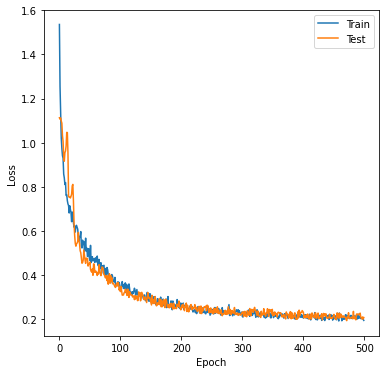

In [ ]:
smodel, ensemble = etrainer.train_swag(
    images, labels, images_test, labels_test, n_models=30)

Make a prediction:

In [ ]:
predictor = aoi.predictors.EnsemblePredictor(smodel, ensemble, nb_classes=3)
nn_out_mean, nn_out_var = predictor.predict(expdata)

Batch 1/1

Plot results:

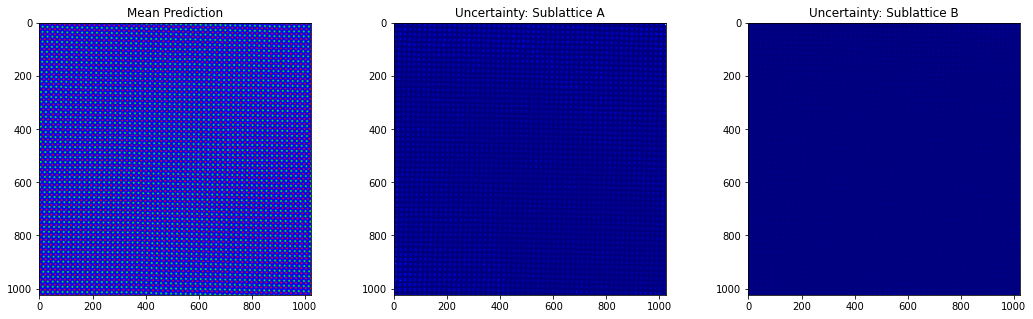

In [ ]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.imshow(nn_out_mean[0])
ax1.set_title("Mean Prediction")
ax2.imshow(nn_out_var[0][..., 0], cmap='jet')
ax2.set_title("Uncertainty: Sublattice A")
ax3.imshow(nn_out_var[0][..., 1], cmap='jet')
ax3.set_title("Uncertainty: Sublattice B");

### From baseline

Train an ensemble of models from a baseline:

In [ ]:
etrainer = aoi.trainers.EnsembleTrainer("Unet", batch_norm=True, nb_classes=3, with_dilation=False)
etrainer.compile_ensemble_trainer(compute_accuracy=True, memory_alloc=0.5)

Training baseline model...
Epoch 1/300 ... Training loss: 1.5231 ... Test loss: 1.1091 ... Train Accuracy: 0.1353 ... Test Accuracy: 0.0405 ... GPU memory usage: 5483/16280
Epoch 100/300 ... Training loss: 0.4007 ... Test loss: 0.3695 ... Train Accuracy: 0.6619 ... Test Accuracy: 0.6565 ... GPU memory usage: 5483/16280
Epoch 200/300 ... Training loss: 0.2672 ... Test loss: 0.2529 ... Train Accuracy: 0.7164 ... Test Accuracy: 0.7336 ... GPU memory usage: 5483/16280
Epoch 300/300 ... Training loss: 0.2267 ... Test loss: 0.2232 ... Train Accuracy: 0.7352 ... Test Accuracy: 0.7449 ... GPU memory usage: 5483/16280
Model (final state) evaluation loss: 0.236
Model (final state) IoU: 0.7257
Plotting training history


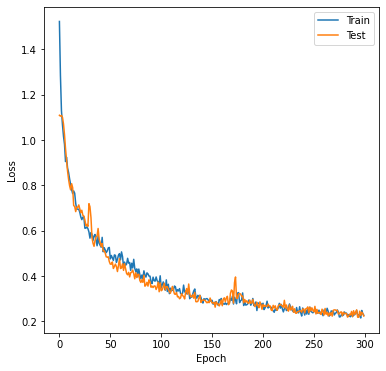


Training ensemble models (strategy = 'from_baseline')

Ensemble model 1
Epoch 1/100 ... Training loss: 0.2179 ... Test loss: 0.3972 ... Train Accuracy: 0.7513 ... Test Accuracy: 0.6468 ... GPU memory usage: 5487/16280
Epoch 10/100 ... Training loss: 0.2501 ... Test loss: 0.2652 ... Train Accuracy: 0.7207 ... Test Accuracy: 0.723 ... GPU memory usage: 5487/16280
Epoch 20/100 ... Training loss: 0.2327 ... Test loss: 0.2417 ... Train Accuracy: 0.7312 ... Test Accuracy: 0.7152 ... GPU memory usage: 5487/16280
Epoch 30/100 ... Training loss: 0.2465 ... Test loss: 0.2134 ... Train Accuracy: 0.7113 ... Test Accuracy: 0.7401 ... GPU memory usage: 5487/16280
Epoch 40/100 ... Training loss: 0.2358 ... Test loss: 0.2098 ... Train Accuracy: 0.7239 ... Test Accuracy: 0.7476 ... GPU memory usage: 5487/16280
Epoch 50/100 ... Training loss: 0.2129 ... Test loss: 0.2093 ... Train Accuracy: 0.7482 ... Test Accuracy: 0.7439 ... GPU memory usage: 5487/16280
Epoch 60/100 ... Training loss: 0.2135 ... Test

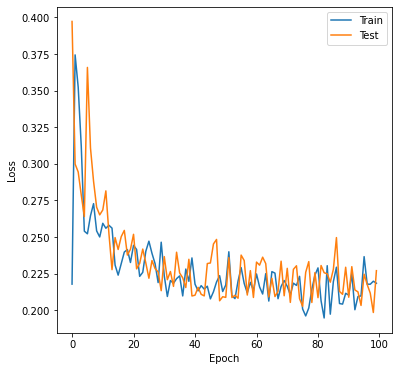


Ensemble model 2
Epoch 1/100 ... Training loss: 0.2275 ... Test loss: 0.3497 ... Train Accuracy: 0.7377 ... Test Accuracy: 0.6433 ... GPU memory usage: 5491/16280
Epoch 10/100 ... Training loss: 0.2592 ... Test loss: 0.2255 ... Train Accuracy: 0.7014 ... Test Accuracy: 0.7386 ... GPU memory usage: 5491/16280
Epoch 20/100 ... Training loss: 0.2204 ... Test loss: 0.2407 ... Train Accuracy: 0.7361 ... Test Accuracy: 0.7238 ... GPU memory usage: 5491/16280
Epoch 30/100 ... Training loss: 0.231 ... Test loss: 0.2182 ... Train Accuracy: 0.7224 ... Test Accuracy: 0.7321 ... GPU memory usage: 5491/16280
Epoch 40/100 ... Training loss: 0.2357 ... Test loss: 0.2323 ... Train Accuracy: 0.7097 ... Test Accuracy: 0.7005 ... GPU memory usage: 5491/16280
Epoch 50/100 ... Training loss: 0.2076 ... Test loss: 0.2141 ... Train Accuracy: 0.7599 ... Test Accuracy: 0.7393 ... GPU memory usage: 5491/16280
Epoch 60/100 ... Training loss: 0.1997 ... Test loss: 0.214 ... Train Accuracy: 0.7628 ... Test Accura

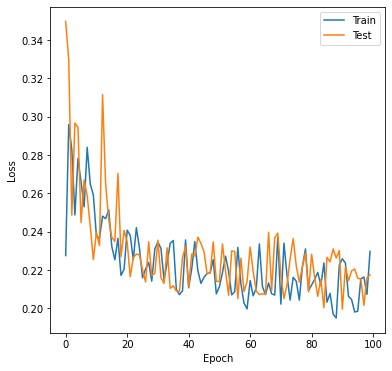


Ensemble model 3
Epoch 1/100 ... Training loss: 0.2114 ... Test loss: 0.4524 ... Train Accuracy: 0.7609 ... Test Accuracy: 0.594 ... GPU memory usage: 5493/16280
Epoch 10/100 ... Training loss: 0.2365 ... Test loss: 0.2558 ... Train Accuracy: 0.7441 ... Test Accuracy: 0.7159 ... GPU memory usage: 5493/16280
Epoch 20/100 ... Training loss: 0.2208 ... Test loss: 0.2365 ... Train Accuracy: 0.7459 ... Test Accuracy: 0.7308 ... GPU memory usage: 5493/16280
Epoch 30/100 ... Training loss: 0.2186 ... Test loss: 0.2532 ... Train Accuracy: 0.7455 ... Test Accuracy: 0.7073 ... GPU memory usage: 5493/16280
Epoch 40/100 ... Training loss: 0.2138 ... Test loss: 0.2344 ... Train Accuracy: 0.7384 ... Test Accuracy: 0.7011 ... GPU memory usage: 5493/16280
Epoch 50/100 ... Training loss: 0.2309 ... Test loss: 0.2293 ... Train Accuracy: 0.7169 ... Test Accuracy: 0.7296 ... GPU memory usage: 5493/16280
Epoch 60/100 ... Training loss: 0.2075 ... Test loss: 0.2077 ... Train Accuracy: 0.7491 ... Test Accur

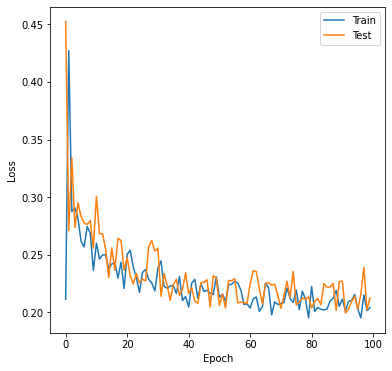


Ensemble model 4
Epoch 1/100 ... Training loss: 0.2236 ... Test loss: 0.4721 ... Train Accuracy: 0.7437 ... Test Accuracy: 0.5797 ... GPU memory usage: 5495/16280
Epoch 10/100 ... Training loss: 0.254 ... Test loss: 0.2487 ... Train Accuracy: 0.7219 ... Test Accuracy: 0.7246 ... GPU memory usage: 5495/16280
Epoch 20/100 ... Training loss: 0.2401 ... Test loss: 0.2554 ... Train Accuracy: 0.7212 ... Test Accuracy: 0.7167 ... GPU memory usage: 5495/16280
Epoch 30/100 ... Training loss: 0.2211 ... Test loss: 0.2169 ... Train Accuracy: 0.7385 ... Test Accuracy: 0.7389 ... GPU memory usage: 5495/16280
Epoch 40/100 ... Training loss: 0.2301 ... Test loss: 0.2329 ... Train Accuracy: 0.7155 ... Test Accuracy: 0.7273 ... GPU memory usage: 5495/16280
Epoch 50/100 ... Training loss: 0.2303 ... Test loss: 0.205 ... Train Accuracy: 0.7272 ... Test Accuracy: 0.7464 ... GPU memory usage: 5495/16280
Epoch 60/100 ... Training loss: 0.2089 ... Test loss: 0.2224 ... Train Accuracy: 0.7504 ... Test Accura

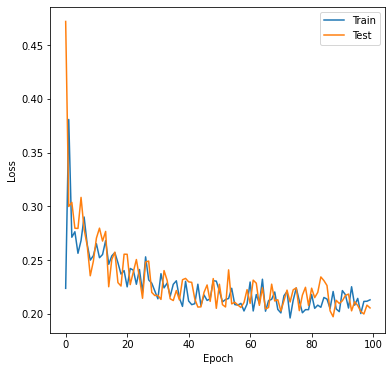


Ensemble model 5
Epoch 1/100 ... Training loss: 0.218 ... Test loss: 0.4762 ... Train Accuracy: 0.7524 ... Test Accuracy: 0.5794 ... GPU memory usage: 5499/16280
Epoch 10/100 ... Training loss: 0.269 ... Test loss: 0.2638 ... Train Accuracy: 0.7093 ... Test Accuracy: 0.7185 ... GPU memory usage: 5499/16280
Epoch 20/100 ... Training loss: 0.2342 ... Test loss: 0.2424 ... Train Accuracy: 0.7255 ... Test Accuracy: 0.7278 ... GPU memory usage: 5499/16280
Epoch 30/100 ... Training loss: 0.2283 ... Test loss: 0.2349 ... Train Accuracy: 0.7331 ... Test Accuracy: 0.7166 ... GPU memory usage: 5499/16280
Epoch 40/100 ... Training loss: 0.2245 ... Test loss: 0.2194 ... Train Accuracy: 0.725 ... Test Accuracy: 0.7283 ... GPU memory usage: 5499/16280
Epoch 50/100 ... Training loss: 0.2071 ... Test loss: 0.2296 ... Train Accuracy: 0.7554 ... Test Accuracy: 0.728 ... GPU memory usage: 5499/16280
Epoch 60/100 ... Training loss: 0.2263 ... Test loss: 0.2359 ... Train Accuracy: 0.7217 ... Test Accuracy

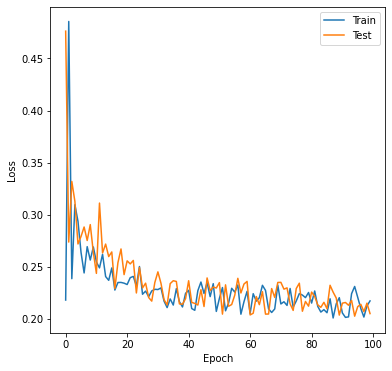


Ensemble model 6
Epoch 1/100 ... Training loss: 0.229 ... Test loss: 0.3688 ... Train Accuracy: 0.7422 ... Test Accuracy: 0.6014 ... GPU memory usage: 5501/16280
Epoch 10/100 ... Training loss: 0.2413 ... Test loss: 0.2457 ... Train Accuracy: 0.7316 ... Test Accuracy: 0.7262 ... GPU memory usage: 5501/16280
Epoch 20/100 ... Training loss: 0.2231 ... Test loss: 0.2486 ... Train Accuracy: 0.7387 ... Test Accuracy: 0.7266 ... GPU memory usage: 5501/16280
Epoch 30/100 ... Training loss: 0.2324 ... Test loss: 0.2308 ... Train Accuracy: 0.731 ... Test Accuracy: 0.7181 ... GPU memory usage: 5501/16280
Epoch 40/100 ... Training loss: 0.2301 ... Test loss: 0.3036 ... Train Accuracy: 0.7283 ... Test Accuracy: 0.6774 ... GPU memory usage: 5501/16280
Epoch 50/100 ... Training loss: 0.2328 ... Test loss: 0.2234 ... Train Accuracy: 0.7257 ... Test Accuracy: 0.7229 ... GPU memory usage: 5501/16280
Epoch 60/100 ... Training loss: 0.2278 ... Test loss: 0.2332 ... Train Accuracy: 0.7365 ... Test Accura

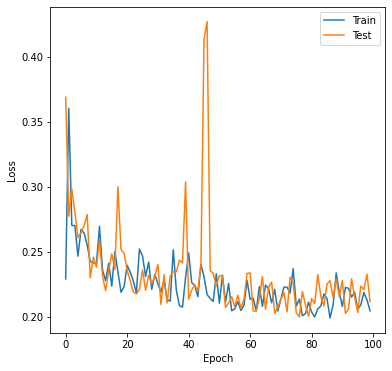


Ensemble model 7
Epoch 1/100 ... Training loss: 0.218 ... Test loss: 0.4762 ... Train Accuracy: 0.7524 ... Test Accuracy: 0.5794 ... GPU memory usage: 5503/16280
Epoch 10/100 ... Training loss: 0.2488 ... Test loss: 0.2665 ... Train Accuracy: 0.7231 ... Test Accuracy: 0.7048 ... GPU memory usage: 5503/16280
Epoch 20/100 ... Training loss: 0.2613 ... Test loss: 0.2643 ... Train Accuracy: 0.6948 ... Test Accuracy: 0.6829 ... GPU memory usage: 5503/16280
Epoch 30/100 ... Training loss: 0.2319 ... Test loss: 0.2369 ... Train Accuracy: 0.7345 ... Test Accuracy: 0.7078 ... GPU memory usage: 5503/16280
Epoch 40/100 ... Training loss: 0.2246 ... Test loss: 0.2243 ... Train Accuracy: 0.7427 ... Test Accuracy: 0.7326 ... GPU memory usage: 5503/16280
Epoch 50/100 ... Training loss: 0.2077 ... Test loss: 0.2078 ... Train Accuracy: 0.7531 ... Test Accuracy: 0.7464 ... GPU memory usage: 5503/16280
Epoch 60/100 ... Training loss: 0.2251 ... Test loss: 0.2276 ... Train Accuracy: 0.7352 ... Test Accur

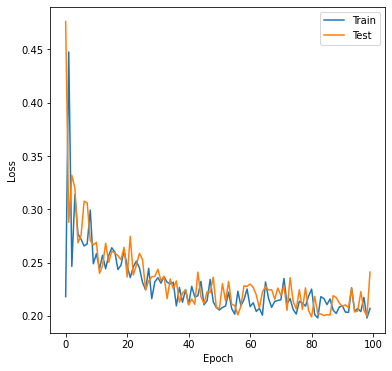


Ensemble model 8
Epoch 1/100 ... Training loss: 0.2216 ... Test loss: 0.4498 ... Train Accuracy: 0.7493 ... Test Accuracy: 0.6052 ... GPU memory usage: 5505/16280
Epoch 10/100 ... Training loss: 0.2696 ... Test loss: 0.2532 ... Train Accuracy: 0.7014 ... Test Accuracy: 0.7066 ... GPU memory usage: 5505/16280
Epoch 20/100 ... Training loss: 0.2381 ... Test loss: 0.2617 ... Train Accuracy: 0.7125 ... Test Accuracy: 0.7028 ... GPU memory usage: 5505/16280
Epoch 30/100 ... Training loss: 0.2149 ... Test loss: 0.2217 ... Train Accuracy: 0.7512 ... Test Accuracy: 0.7372 ... GPU memory usage: 5505/16280
Epoch 40/100 ... Training loss: 0.2272 ... Test loss: 0.2087 ... Train Accuracy: 0.7277 ... Test Accuracy: 0.746 ... GPU memory usage: 5505/16280
Epoch 50/100 ... Training loss: 0.2326 ... Test loss: 0.2282 ... Train Accuracy: 0.7379 ... Test Accuracy: 0.7265 ... GPU memory usage: 5505/16280
Epoch 60/100 ... Training loss: 0.2193 ... Test loss: 0.2213 ... Train Accuracy: 0.7327 ... Test Accur

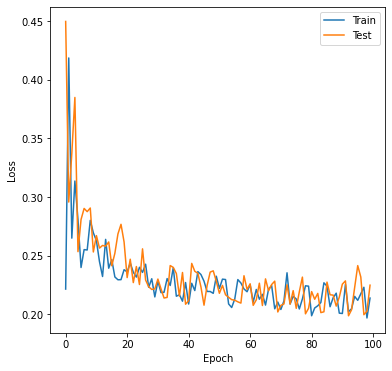


Ensemble model 9
Epoch 1/100 ... Training loss: 0.2234 ... Test loss: 0.4092 ... Train Accuracy: 0.744 ... Test Accuracy: 0.6144 ... GPU memory usage: 5507/16280
Epoch 10/100 ... Training loss: 0.2439 ... Test loss: 0.2985 ... Train Accuracy: 0.7204 ... Test Accuracy: 0.6771 ... GPU memory usage: 5507/16280
Epoch 20/100 ... Training loss: 0.2296 ... Test loss: 0.2329 ... Train Accuracy: 0.7363 ... Test Accuracy: 0.7228 ... GPU memory usage: 5507/16280
Epoch 30/100 ... Training loss: 0.2436 ... Test loss: 0.2507 ... Train Accuracy: 0.7132 ... Test Accuracy: 0.7082 ... GPU memory usage: 5507/16280
Epoch 40/100 ... Training loss: 0.2205 ... Test loss: 0.2088 ... Train Accuracy: 0.743 ... Test Accuracy: 0.7448 ... GPU memory usage: 5507/16280
Epoch 50/100 ... Training loss: 0.2054 ... Test loss: 0.2148 ... Train Accuracy: 0.7585 ... Test Accuracy: 0.7222 ... GPU memory usage: 5507/16280
Epoch 60/100 ... Training loss: 0.2179 ... Test loss: 0.2293 ... Train Accuracy: 0.7362 ... Test Accura

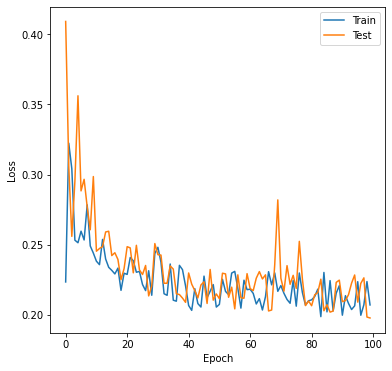


Ensemble model 10
Epoch 1/100 ... Training loss: 0.2155 ... Test loss: 0.4829 ... Train Accuracy: 0.7604 ... Test Accuracy: 0.598 ... GPU memory usage: 5509/16280
Epoch 10/100 ... Training loss: 0.264 ... Test loss: 0.2511 ... Train Accuracy: 0.6856 ... Test Accuracy: 0.7126 ... GPU memory usage: 5509/16280
Epoch 20/100 ... Training loss: 0.2361 ... Test loss: 0.2546 ... Train Accuracy: 0.7287 ... Test Accuracy: 0.7133 ... GPU memory usage: 5509/16280
Epoch 30/100 ... Training loss: 0.2235 ... Test loss: 0.2222 ... Train Accuracy: 0.7341 ... Test Accuracy: 0.7298 ... GPU memory usage: 5509/16280
Epoch 40/100 ... Training loss: 0.2272 ... Test loss: 0.2182 ... Train Accuracy: 0.7348 ... Test Accuracy: 0.7186 ... GPU memory usage: 5509/16280
Epoch 50/100 ... Training loss: 0.208 ... Test loss: 0.2075 ... Train Accuracy: 0.7526 ... Test Accuracy: 0.7465 ... GPU memory usage: 5509/16280
Epoch 60/100 ... Training loss: 0.2084 ... Test loss: 0.2105 ... Train Accuracy: 0.7554 ... Test Accura

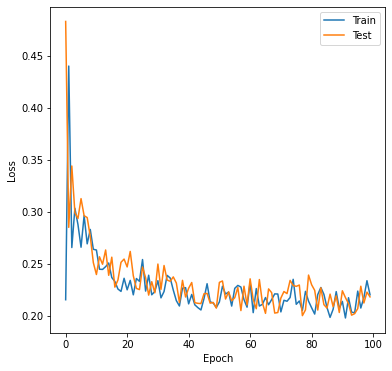

In [ ]:
smodel, ensemble = etrainer.train_ensemble_from_baseline(
    images, labels, images_test, labels_test, n_models=10,
    training_cycles_base=300, training_cycles_ensemble=100)

Make a prediction:

In [ ]:
predictor = aoi.predictors.EnsemblePredictor(smodel, ensemble, nb_classes=3)
nn_out_mean, nn_out_var = predictor.predict(expdata)

Batch 1/1

Plot results:

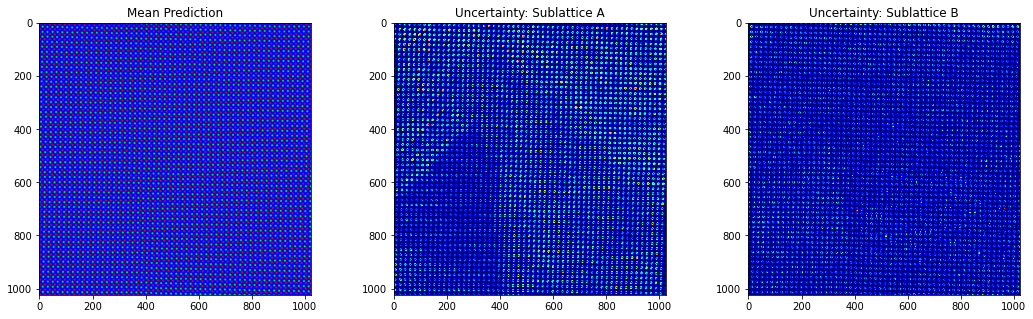

In [ ]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.imshow(nn_out_mean[0])
ax1.set_title("Mean Prediction")
ax2.imshow(nn_out_var[0][..., 0], vmin=0.0, vmax=0.02, cmap='jet')
ax2.set_title("Uncertainty: Sublattice A")
ax3.imshow(nn_out_var[0][..., 1], vmin=0.0, vmax=0.01, cmap='jet')
ax3.set_title("Uncertainty: Sublattice B");

Train from existing baseline model:

In [ ]:
etrainer = aoi.trainers.EnsembleTrainer("Unet", batch_norm=True, nb_classes=3, with_dilation=False)
etrainer.compile_ensemble_trainer(compute_accuracy=True, memory_alloc=0.5)


Training ensemble models (strategy = 'from_baseline')

Ensemble model 1
Epoch 1/100 ... Training loss: 0.207 ... Test loss: 0.4498 ... Train Accuracy: 0.7487 ... Test Accuracy: 0.6116 ... GPU memory usage: 5823/16280
Epoch 10/100 ... Training loss: 0.2382 ... Test loss: 0.2261 ... Train Accuracy: 0.7194 ... Test Accuracy: 0.7278 ... GPU memory usage: 5823/16280
Epoch 20/100 ... Training loss: 0.2235 ... Test loss: 0.2281 ... Train Accuracy: 0.7374 ... Test Accuracy: 0.7239 ... GPU memory usage: 5823/16280
Epoch 30/100 ... Training loss: 0.2343 ... Test loss: 0.2024 ... Train Accuracy: 0.7208 ... Test Accuracy: 0.7502 ... GPU memory usage: 5823/16280
Epoch 40/100 ... Training loss: 0.2213 ... Test loss: 0.1984 ... Train Accuracy: 0.7324 ... Test Accuracy: 0.7499 ... GPU memory usage: 5823/16280
Epoch 50/100 ... Training loss: 0.2011 ... Test loss: 0.1978 ... Train Accuracy: 0.7568 ... Test Accuracy: 0.7541 ... GPU memory usage: 5823/16280
Epoch 60/100 ... Training loss: 0.2086 ... Test

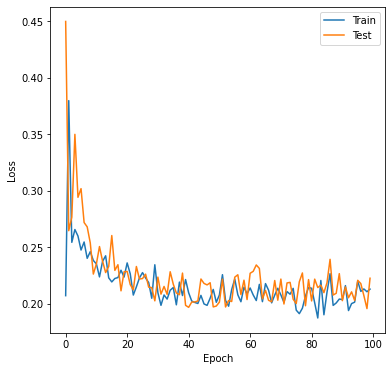


Ensemble model 2
Epoch 1/100 ... Training loss: 0.2079 ... Test loss: 0.4517 ... Train Accuracy: 0.7494 ... Test Accuracy: 0.5923 ... GPU memory usage: 5505/16280
Epoch 10/100 ... Training loss: 0.2458 ... Test loss: 0.2158 ... Train Accuracy: 0.7006 ... Test Accuracy: 0.7398 ... GPU memory usage: 5505/16280
Epoch 20/100 ... Training loss: 0.208 ... Test loss: 0.213 ... Train Accuracy: 0.742 ... Test Accuracy: 0.737 ... GPU memory usage: 5505/16280
Epoch 30/100 ... Training loss: 0.2162 ... Test loss: 0.2064 ... Train Accuracy: 0.73 ... Test Accuracy: 0.7415 ... GPU memory usage: 5505/16280
Epoch 40/100 ... Training loss: 0.2187 ... Test loss: 0.2219 ... Train Accuracy: 0.7229 ... Test Accuracy: 0.7074 ... GPU memory usage: 5505/16280
Epoch 50/100 ... Training loss: 0.1953 ... Test loss: 0.1995 ... Train Accuracy: 0.769 ... Test Accuracy: 0.7509 ... GPU memory usage: 5505/16280
Epoch 60/100 ... Training loss: 0.1927 ... Test loss: 0.2064 ... Train Accuracy: 0.7635 ... Test Accuracy: 0

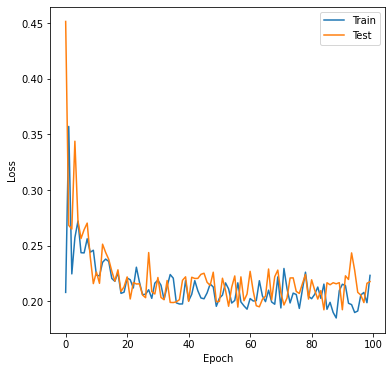


Ensemble model 3
Epoch 1/100 ... Training loss: 0.1983 ... Test loss: 0.5295 ... Train Accuracy: 0.764 ... Test Accuracy: 0.5546 ... GPU memory usage: 5509/16280
Epoch 10/100 ... Training loss: 0.2451 ... Test loss: 0.2542 ... Train Accuracy: 0.7124 ... Test Accuracy: 0.6924 ... GPU memory usage: 5509/16280
Epoch 20/100 ... Training loss: 0.2205 ... Test loss: 0.2216 ... Train Accuracy: 0.7337 ... Test Accuracy: 0.7319 ... GPU memory usage: 5509/16280
Epoch 30/100 ... Training loss: 0.2021 ... Test loss: 0.2454 ... Train Accuracy: 0.7574 ... Test Accuracy: 0.7181 ... GPU memory usage: 5509/16280
Epoch 40/100 ... Training loss: 0.2034 ... Test loss: 0.2273 ... Train Accuracy: 0.7416 ... Test Accuracy: 0.707 ... GPU memory usage: 5509/16280
Epoch 50/100 ... Training loss: 0.2214 ... Test loss: 0.2202 ... Train Accuracy: 0.7176 ... Test Accuracy: 0.7332 ... GPU memory usage: 5509/16280
Epoch 60/100 ... Training loss: 0.1993 ... Test loss: 0.2052 ... Train Accuracy: 0.7555 ... Test Accura

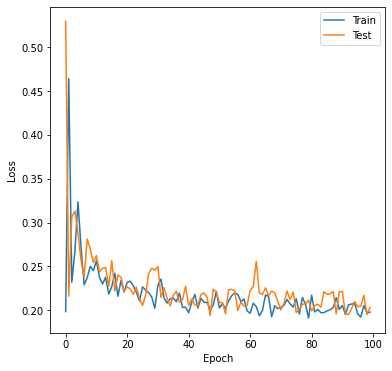


Ensemble model 4
Epoch 1/100 ... Training loss: 0.2086 ... Test loss: 0.5331 ... Train Accuracy: 0.7487 ... Test Accuracy: 0.5655 ... GPU memory usage: 5511/16280
Epoch 10/100 ... Training loss: 0.2628 ... Test loss: 0.2739 ... Train Accuracy: 0.6906 ... Test Accuracy: 0.6731 ... GPU memory usage: 5511/16280
Epoch 20/100 ... Training loss: 0.2379 ... Test loss: 0.2464 ... Train Accuracy: 0.7104 ... Test Accuracy: 0.7149 ... GPU memory usage: 5511/16280
Epoch 30/100 ... Training loss: 0.2136 ... Test loss: 0.2113 ... Train Accuracy: 0.7405 ... Test Accuracy: 0.7414 ... GPU memory usage: 5511/16280
Epoch 40/100 ... Training loss: 0.2201 ... Test loss: 0.2347 ... Train Accuracy: 0.7198 ... Test Accuracy: 0.7303 ... GPU memory usage: 5511/16280
Epoch 50/100 ... Training loss: 0.2152 ... Test loss: 0.199 ... Train Accuracy: 0.7389 ... Test Accuracy: 0.7491 ... GPU memory usage: 5511/16280
Epoch 60/100 ... Training loss: 0.1979 ... Test loss: 0.2162 ... Train Accuracy: 0.76 ... Test Accurac

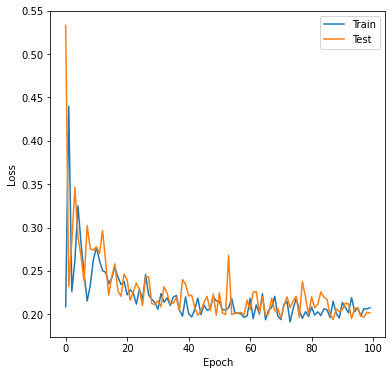


Ensemble model 5
Epoch 1/100 ... Training loss: 0.2046 ... Test loss: 0.545 ... Train Accuracy: 0.7562 ... Test Accuracy: 0.5505 ... GPU memory usage: 5513/16280
Epoch 10/100 ... Training loss: 0.2535 ... Test loss: 0.263 ... Train Accuracy: 0.7084 ... Test Accuracy: 0.6956 ... GPU memory usage: 5513/16280
Epoch 20/100 ... Training loss: 0.2257 ... Test loss: 0.2263 ... Train Accuracy: 0.7248 ... Test Accuracy: 0.7428 ... GPU memory usage: 5513/16280
Epoch 30/100 ... Training loss: 0.2129 ... Test loss: 0.2315 ... Train Accuracy: 0.7453 ... Test Accuracy: 0.7189 ... GPU memory usage: 5513/16280
Epoch 40/100 ... Training loss: 0.2116 ... Test loss: 0.2096 ... Train Accuracy: 0.7283 ... Test Accuracy: 0.7336 ... GPU memory usage: 5513/16280
Epoch 50/100 ... Training loss: 0.1989 ... Test loss: 0.2211 ... Train Accuracy: 0.7581 ... Test Accuracy: 0.7343 ... GPU memory usage: 5513/16280
Epoch 60/100 ... Training loss: 0.2204 ... Test loss: 0.2314 ... Train Accuracy: 0.7263 ... Test Accura

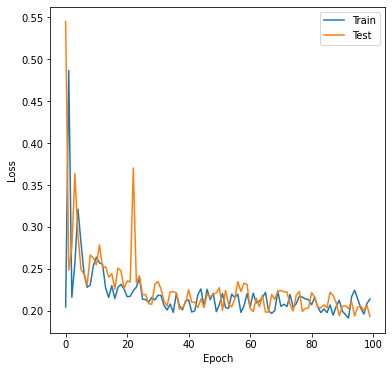


Ensemble model 6
Epoch 1/100 ... Training loss: 0.2085 ... Test loss: 0.3965 ... Train Accuracy: 0.7566 ... Test Accuracy: 0.5861 ... GPU memory usage: 5515/16280
Epoch 10/100 ... Training loss: 0.2266 ... Test loss: 0.2395 ... Train Accuracy: 0.7375 ... Test Accuracy: 0.7244 ... GPU memory usage: 5515/16280
Epoch 20/100 ... Training loss: 0.214 ... Test loss: 0.2256 ... Train Accuracy: 0.7436 ... Test Accuracy: 0.7359 ... GPU memory usage: 5515/16280
Epoch 30/100 ... Training loss: 0.2202 ... Test loss: 0.2487 ... Train Accuracy: 0.7341 ... Test Accuracy: 0.6971 ... GPU memory usage: 5515/16280
Epoch 40/100 ... Training loss: 0.2116 ... Test loss: 0.2243 ... Train Accuracy: 0.7458 ... Test Accuracy: 0.7333 ... GPU memory usage: 5515/16280
Epoch 50/100 ... Training loss: 0.2186 ... Test loss: 0.2108 ... Train Accuracy: 0.7392 ... Test Accuracy: 0.7341 ... GPU memory usage: 5515/16280
Epoch 60/100 ... Training loss: 0.2172 ... Test loss: 0.2224 ... Train Accuracy: 0.7422 ... Test Accur

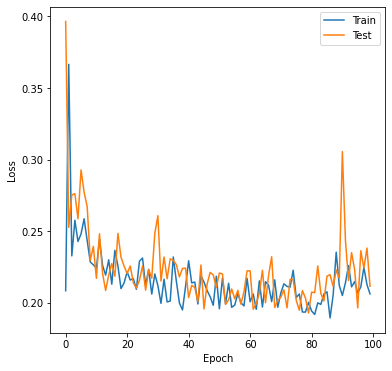


Ensemble model 7
Epoch 1/100 ... Training loss: 0.2046 ... Test loss: 0.545 ... Train Accuracy: 0.7562 ... Test Accuracy: 0.5505 ... GPU memory usage: 5517/16280
Epoch 10/100 ... Training loss: 0.2329 ... Test loss: 0.2597 ... Train Accuracy: 0.7252 ... Test Accuracy: 0.6937 ... GPU memory usage: 5517/16280
Epoch 20/100 ... Training loss: 0.2388 ... Test loss: 0.2497 ... Train Accuracy: 0.705 ... Test Accuracy: 0.6848 ... GPU memory usage: 5517/16280
Epoch 30/100 ... Training loss: 0.2188 ... Test loss: 0.2205 ... Train Accuracy: 0.7423 ... Test Accuracy: 0.7233 ... GPU memory usage: 5517/16280
Epoch 40/100 ... Training loss: 0.2136 ... Test loss: 0.2151 ... Train Accuracy: 0.7477 ... Test Accuracy: 0.7387 ... GPU memory usage: 5517/16280
Epoch 50/100 ... Training loss: 0.1983 ... Test loss: 0.1978 ... Train Accuracy: 0.7581 ... Test Accuracy: 0.7543 ... GPU memory usage: 5517/16280
Epoch 60/100 ... Training loss: 0.2192 ... Test loss: 0.2194 ... Train Accuracy: 0.7369 ... Test Accura

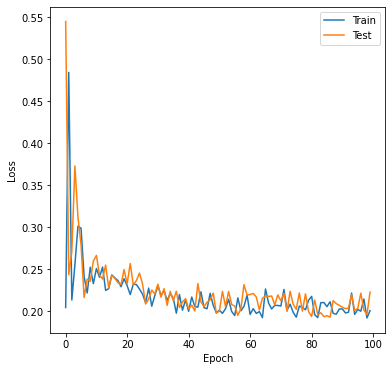


Ensemble model 8
Epoch 1/100 ... Training loss: 0.2029 ... Test loss: 0.4343 ... Train Accuracy: 0.7591 ... Test Accuracy: 0.5906 ... GPU memory usage: 5519/16280
Epoch 10/100 ... Training loss: 0.2552 ... Test loss: 0.2474 ... Train Accuracy: 0.6985 ... Test Accuracy: 0.6994 ... GPU memory usage: 5519/16280
Epoch 20/100 ... Training loss: 0.215 ... Test loss: 0.2335 ... Train Accuracy: 0.729 ... Test Accuracy: 0.7243 ... GPU memory usage: 5519/16280
Epoch 30/100 ... Training loss: 0.2054 ... Test loss: 0.2078 ... Train Accuracy: 0.755 ... Test Accuracy: 0.7458 ... GPU memory usage: 5519/16280
Epoch 40/100 ... Training loss: 0.2157 ... Test loss: 0.2046 ... Train Accuracy: 0.7328 ... Test Accuracy: 0.7447 ... GPU memory usage: 5519/16280
Epoch 50/100 ... Training loss: 0.2207 ... Test loss: 0.2206 ... Train Accuracy: 0.7431 ... Test Accuracy: 0.7322 ... GPU memory usage: 5519/16280
Epoch 60/100 ... Training loss: 0.2105 ... Test loss: 0.218 ... Train Accuracy: 0.7384 ... Test Accuracy

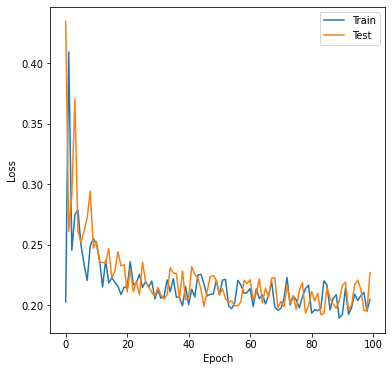


Ensemble model 9
Epoch 1/100 ... Training loss: 0.1995 ... Test loss: 0.518 ... Train Accuracy: 0.761 ... Test Accuracy: 0.5858 ... GPU memory usage: 5505/16280
Epoch 10/100 ... Training loss: 0.2405 ... Test loss: 0.2506 ... Train Accuracy: 0.7125 ... Test Accuracy: 0.7168 ... GPU memory usage: 5505/16280
Epoch 20/100 ... Training loss: 0.2211 ... Test loss: 0.2164 ... Train Accuracy: 0.7411 ... Test Accuracy: 0.7337 ... GPU memory usage: 5505/16280
Epoch 30/100 ... Training loss: 0.2349 ... Test loss: 0.2317 ... Train Accuracy: 0.7228 ... Test Accuracy: 0.7247 ... GPU memory usage: 5505/16280
Epoch 40/100 ... Training loss: 0.2082 ... Test loss: 0.2058 ... Train Accuracy: 0.7445 ... Test Accuracy: 0.7419 ... GPU memory usage: 5505/16280
Epoch 50/100 ... Training loss: 0.2023 ... Test loss: 0.2045 ... Train Accuracy: 0.7565 ... Test Accuracy: 0.7269 ... GPU memory usage: 5505/16280
Epoch 60/100 ... Training loss: 0.2094 ... Test loss: 0.2181 ... Train Accuracy: 0.7385 ... Test Accura

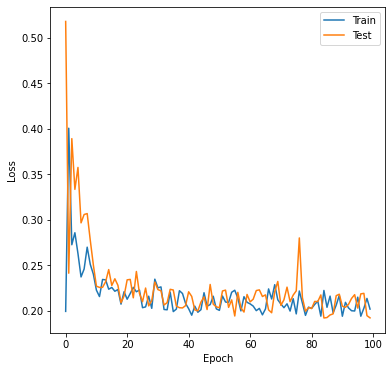


Ensemble model 10
Epoch 1/100 ... Training loss: 0.2008 ... Test loss: 0.4427 ... Train Accuracy: 0.7653 ... Test Accuracy: 0.6038 ... GPU memory usage: 5509/16280
Epoch 10/100 ... Training loss: 0.2486 ... Test loss: 0.2341 ... Train Accuracy: 0.6898 ... Test Accuracy: 0.7211 ... GPU memory usage: 5509/16280
Epoch 20/100 ... Training loss: 0.2192 ... Test loss: 0.2395 ... Train Accuracy: 0.7355 ... Test Accuracy: 0.7192 ... GPU memory usage: 5509/16280
Epoch 30/100 ... Training loss: 0.2136 ... Test loss: 0.2383 ... Train Accuracy: 0.7389 ... Test Accuracy: 0.732 ... GPU memory usage: 5509/16280
Epoch 40/100 ... Training loss: 0.2151 ... Test loss: 0.2086 ... Train Accuracy: 0.743 ... Test Accuracy: 0.7282 ... GPU memory usage: 5509/16280
Epoch 50/100 ... Training loss: 0.1982 ... Test loss: 0.201 ... Train Accuracy: 0.76 ... Test Accuracy: 0.7503 ... GPU memory usage: 5509/16280
Epoch 60/100 ... Training loss: 0.1988 ... Test loss: 0.2032 ... Train Accuracy: 0.7603 ... Test Accuracy

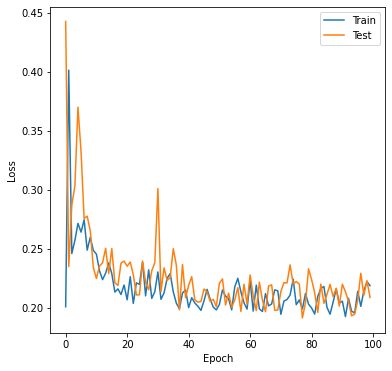

In [ ]:
smodel, ensemble = etrainer.train_ensemble_from_baseline(
    images, labels, images_test, labels_test,
    basemodel=smodel, n_models=10, training_cycles_ensemble=100)

Make a prediction:

Batch 1/1

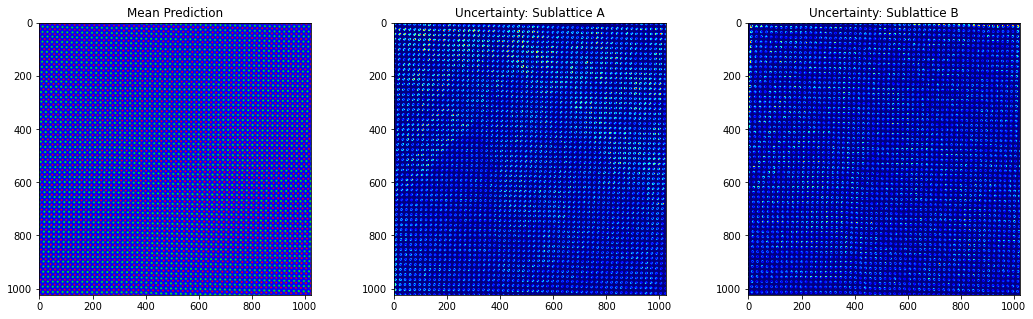

In [ ]:
predictor = aoi.predictors.EnsemblePredictor(smodel, ensemble, nb_classes=3)
nn_out_mean, nn_out_var = predictor.predict(expdata)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.imshow(nn_out_mean[0])
ax1.set_title("Mean Prediction")
ax2.imshow(nn_out_var[0][..., 0], vmin=0.0, vmax=0.02, cmap='jet')
ax2.set_title("Uncertainty: Sublattice A")
ax3.imshow(nn_out_var[0][..., 1], vmin=0.0, vmax=0.01, cmap='jet')
ax3.set_title("Uncertainty: Sublattice B");

### From scratch

Train from scratch:

In [ ]:
etrainer = aoi.trainers.EnsembleTrainer("Unet", batch_norm=True, nb_classes=3, with_dilation=False)
etrainer.compile_ensemble_trainer(training_cycles=400, compute_accuracy=True, swa=True, memory_alloc=0.5)

Training ensemble models (strategy = 'from_scratch')

Ensemble model 1
Epoch 1/400 ... Training loss: 1.5473 ... Test loss: 1.107 ... Train Accuracy: 0.1261 ... Test Accuracy: 0.039 ... GPU memory usage: 5521/16280
Epoch 100/400 ... Training loss: 0.3651 ... Test loss: 0.3795 ... Train Accuracy: 0.6883 ... Test Accuracy: 0.6691 ... GPU memory usage: 5521/16280
Epoch 200/400 ... Training loss: 0.2454 ... Test loss: 0.2458 ... Train Accuracy: 0.7407 ... Test Accuracy: 0.7329 ... GPU memory usage: 5521/16280
Epoch 300/400 ... Training loss: 0.2125 ... Test loss: 0.2251 ... Train Accuracy: 0.7585 ... Test Accuracy: 0.7181 ... GPU memory usage: 5521/16280
Epoch 400/400 ... Training loss: 0.2259 ... Test loss: 0.2085 ... Train Accuracy: 0.7286 ... Test Accuracy: 0.7454 ... GPU memory usage: 5521/16280
Model (final state) evaluation loss: 0.2189
Model (final state) IoU: 0.734
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2113
Model (final state) IoU: 0.7453


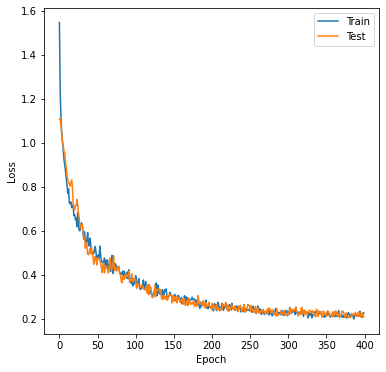


Ensemble model 2
Epoch 1/400 ... Training loss: 1.5175 ... Test loss: 1.108 ... Train Accuracy: 0.1389 ... Test Accuracy: 0.0368 ... GPU memory usage: 5521/16280
Epoch 100/400 ... Training loss: 0.4071 ... Test loss: 0.3345 ... Train Accuracy: 0.6517 ... Test Accuracy: 0.6935 ... GPU memory usage: 5521/16280
Epoch 200/400 ... Training loss: 0.2554 ... Test loss: 0.2555 ... Train Accuracy: 0.7312 ... Test Accuracy: 0.7089 ... GPU memory usage: 5521/16280
Epoch 300/400 ... Training loss: 0.2246 ... Test loss: 0.2088 ... Train Accuracy: 0.7363 ... Test Accuracy: 0.752 ... GPU memory usage: 5521/16280
Epoch 400/400 ... Training loss: 0.2118 ... Test loss: 0.2074 ... Train Accuracy: 0.7451 ... Test Accuracy: 0.7502 ... GPU memory usage: 5779/16280
Model (final state) evaluation loss: 0.2205
Model (final state) IoU: 0.7358
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.212
Model (final state) IoU: 0.7404
Plotting training history


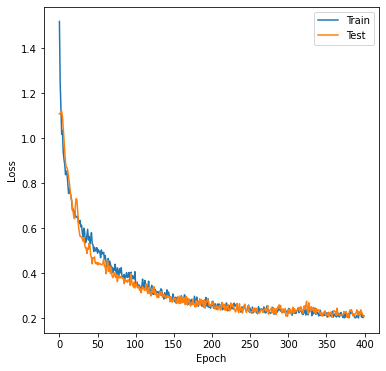


Ensemble model 3
Epoch 1/400 ... Training loss: 1.4844 ... Test loss: 1.113 ... Train Accuracy: 0.1666 ... Test Accuracy: 0.0403 ... GPU memory usage: 5521/16280
Epoch 100/400 ... Training loss: 0.3703 ... Test loss: 0.3649 ... Train Accuracy: 0.6975 ... Test Accuracy: 0.6904 ... GPU memory usage: 5521/16280
Epoch 200/400 ... Training loss: 0.253 ... Test loss: 0.3095 ... Train Accuracy: 0.732 ... Test Accuracy: 0.6642 ... GPU memory usage: 5521/16280
Epoch 300/400 ... Training loss: 0.2165 ... Test loss: 0.2264 ... Train Accuracy: 0.7577 ... Test Accuracy: 0.7393 ... GPU memory usage: 5521/16280
Epoch 400/400 ... Training loss: 0.2385 ... Test loss: 0.2351 ... Train Accuracy: 0.7152 ... Test Accuracy: 0.7101 ... GPU memory usage: 5521/16280
Model (final state) evaluation loss: 0.218
Model (final state) IoU: 0.7378
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2145
Model (final state) IoU: 0.7401
Plotting training history


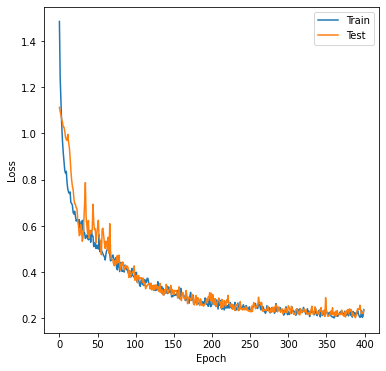


Ensemble model 4
Epoch 1/400 ... Training loss: 1.5275 ... Test loss: 1.1462 ... Train Accuracy: 0.1157 ... Test Accuracy: 0.0368 ... GPU memory usage: 5521/16280
Epoch 100/400 ... Training loss: 0.3741 ... Test loss: 0.3908 ... Train Accuracy: 0.6999 ... Test Accuracy: 0.6684 ... GPU memory usage: 5521/16280
Epoch 200/400 ... Training loss: 0.2701 ... Test loss: 0.2609 ... Train Accuracy: 0.7122 ... Test Accuracy: 0.7116 ... GPU memory usage: 5521/16280
Epoch 300/400 ... Training loss: 0.2269 ... Test loss: 0.2283 ... Train Accuracy: 0.7316 ... Test Accuracy: 0.7275 ... GPU memory usage: 5521/16280
Epoch 400/400 ... Training loss: 0.2123 ... Test loss: 0.2333 ... Train Accuracy: 0.7519 ... Test Accuracy: 0.7254 ... GPU memory usage: 5521/16280
Model (final state) evaluation loss: 0.2198
Model (final state) IoU: 0.7367
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.221
Model (final state) IoU: 0.7344
Plotting training history


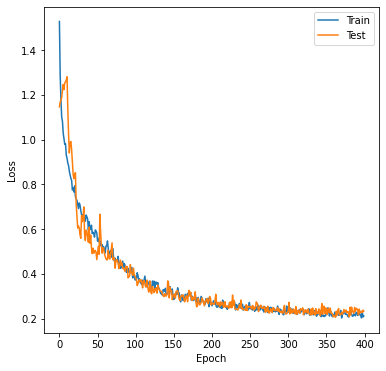


Ensemble model 5
Epoch 1/400 ... Training loss: 1.4626 ... Test loss: 1.0902 ... Train Accuracy: 0.1307 ... Test Accuracy: 0.0381 ... GPU memory usage: 5521/16280
Epoch 100/400 ... Training loss: 0.3917 ... Test loss: 0.359 ... Train Accuracy: 0.6775 ... Test Accuracy: 0.6852 ... GPU memory usage: 5521/16280
Epoch 200/400 ... Training loss: 0.2556 ... Test loss: 0.2488 ... Train Accuracy: 0.7259 ... Test Accuracy: 0.7384 ... GPU memory usage: 5521/16280
Epoch 300/400 ... Training loss: 0.2491 ... Test loss: 0.227 ... Train Accuracy: 0.7159 ... Test Accuracy: 0.7378 ... GPU memory usage: 5521/16280
Epoch 400/400 ... Training loss: 0.2184 ... Test loss: 0.2241 ... Train Accuracy: 0.7472 ... Test Accuracy: 0.7332 ... GPU memory usage: 5521/16280
Model (final state) evaluation loss: 0.2171
Model (final state) IoU: 0.7378
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2122
Model (final state) IoU: 0.7436
Plotting training history


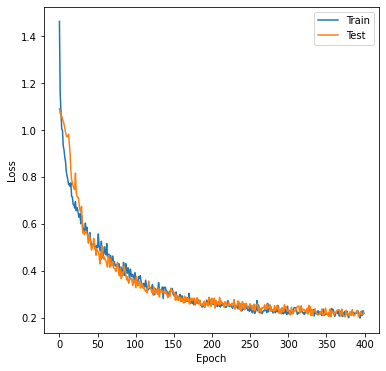


Ensemble model 6
Epoch 1/400 ... Training loss: 1.6563 ... Test loss: 1.1088 ... Train Accuracy: 0.1507 ... Test Accuracy: 0.0386 ... GPU memory usage: 5523/16280
Epoch 100/400 ... Training loss: 0.394 ... Test loss: 0.3372 ... Train Accuracy: 0.6546 ... Test Accuracy: 0.6712 ... GPU memory usage: 5523/16280
Epoch 200/400 ... Training loss: 0.2541 ... Test loss: 0.2746 ... Train Accuracy: 0.7357 ... Test Accuracy: 0.7 ... GPU memory usage: 5523/16280
Epoch 300/400 ... Training loss: 0.2321 ... Test loss: 0.2274 ... Train Accuracy: 0.7355 ... Test Accuracy: 0.7172 ... GPU memory usage: 5523/16280
Epoch 400/400 ... Training loss: 0.2294 ... Test loss: 0.2307 ... Train Accuracy: 0.7377 ... Test Accuracy: 0.7278 ... GPU memory usage: 5523/16280
Model (final state) evaluation loss: 0.2193
Model (final state) IoU: 0.7357
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2158
Model (final state) IoU: 0.7379
Plotting training history


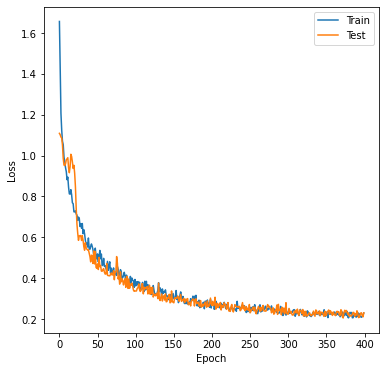


Ensemble model 7
Epoch 1/400 ... Training loss: 1.8838 ... Test loss: 1.1075 ... Train Accuracy: 0.1311 ... Test Accuracy: 0.0358 ... GPU memory usage: 5525/16280
Epoch 100/400 ... Training loss: 0.3934 ... Test loss: 0.4 ... Train Accuracy: 0.6695 ... Test Accuracy: 0.6457 ... GPU memory usage: 5525/16280
Epoch 200/400 ... Training loss: 0.2696 ... Test loss: 0.2759 ... Train Accuracy: 0.7214 ... Test Accuracy: 0.7059 ... GPU memory usage: 5525/16280
Epoch 300/400 ... Training loss: 0.236 ... Test loss: 0.2352 ... Train Accuracy: 0.7319 ... Test Accuracy: 0.7341 ... GPU memory usage: 5525/16280
Epoch 400/400 ... Training loss: 0.2236 ... Test loss: 0.2187 ... Train Accuracy: 0.74 ... Test Accuracy: 0.7331 ... GPU memory usage: 5525/16280
Model (final state) evaluation loss: 0.225
Model (final state) IoU: 0.7318
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2174
Model (final state) IoU: 0.7375
Plotting training history


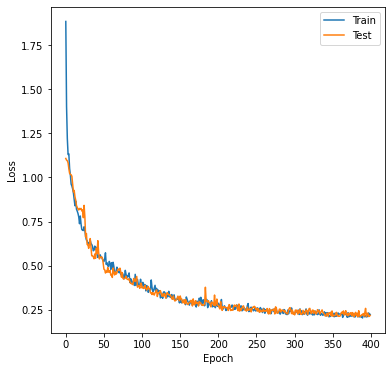


Ensemble model 8
Epoch 1/400 ... Training loss: 1.5304 ... Test loss: 1.0799 ... Train Accuracy: 0.1188 ... Test Accuracy: 0.0405 ... GPU memory usage: 5527/16280
Epoch 100/400 ... Training loss: 0.4294 ... Test loss: 0.4126 ... Train Accuracy: 0.6543 ... Test Accuracy: 0.6616 ... GPU memory usage: 5527/16280
Epoch 200/400 ... Training loss: 0.2696 ... Test loss: 0.2752 ... Train Accuracy: 0.7226 ... Test Accuracy: 0.706 ... GPU memory usage: 5527/16280
Epoch 300/400 ... Training loss: 0.2175 ... Test loss: 0.2435 ... Train Accuracy: 0.742 ... Test Accuracy: 0.7256 ... GPU memory usage: 5527/16280
Epoch 400/400 ... Training loss: 0.2294 ... Test loss: 0.2095 ... Train Accuracy: 0.7262 ... Test Accuracy: 0.7396 ... GPU memory usage: 5527/16280
Model (final state) evaluation loss: 0.218
Model (final state) IoU: 0.7303
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2159
Model (final state) IoU: 0.7421
Plotting training history


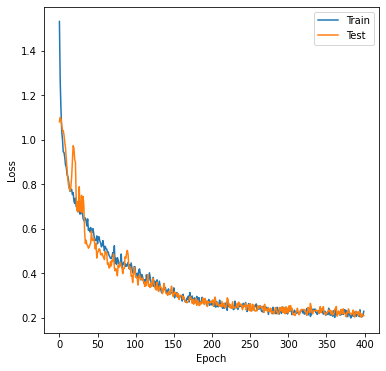


Ensemble model 9
Epoch 1/400 ... Training loss: 1.3567 ... Test loss: 1.12 ... Train Accuracy: 0.1334 ... Test Accuracy: 0.0403 ... GPU memory usage: 5529/16280
Epoch 100/400 ... Training loss: 0.4263 ... Test loss: 0.3791 ... Train Accuracy: 0.6741 ... Test Accuracy: 0.686 ... GPU memory usage: 5529/16280
Epoch 200/400 ... Training loss: 0.2556 ... Test loss: 0.2673 ... Train Accuracy: 0.7424 ... Test Accuracy: 0.7226 ... GPU memory usage: 5529/16280
Epoch 300/400 ... Training loss: 0.242 ... Test loss: 0.2696 ... Train Accuracy: 0.7288 ... Test Accuracy: 0.6867 ... GPU memory usage: 5529/16280
Epoch 400/400 ... Training loss: 0.2081 ... Test loss: 0.2315 ... Train Accuracy: 0.7497 ... Test Accuracy: 0.7275 ... GPU memory usage: 5529/16280
Model (final state) evaluation loss: 0.2185
Model (final state) IoU: 0.7395
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.2153
Model (final state) IoU: 0.7396
Plotting training history


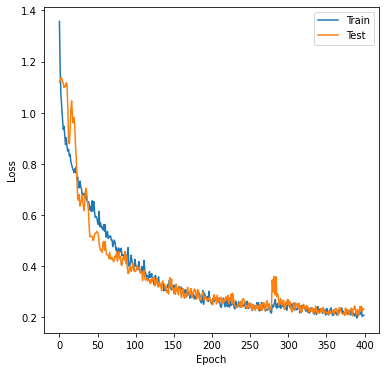


Ensemble model 10
Epoch 1/400 ... Training loss: 1.5005 ... Test loss: 1.0761 ... Train Accuracy: 0.1253 ... Test Accuracy: 0.0381 ... GPU memory usage: 5531/16280
Epoch 100/400 ... Training loss: 0.3767 ... Test loss: 0.3817 ... Train Accuracy: 0.6796 ... Test Accuracy: 0.6396 ... GPU memory usage: 5531/16280
Epoch 200/400 ... Training loss: 0.269 ... Test loss: 0.2873 ... Train Accuracy: 0.7201 ... Test Accuracy: 0.6763 ... GPU memory usage: 5531/16280
Epoch 300/400 ... Training loss: 0.228 ... Test loss: 0.2359 ... Train Accuracy: 0.7435 ... Test Accuracy: 0.7212 ... GPU memory usage: 5531/16280
Epoch 400/400 ... Training loss: 0.2126 ... Test loss: 0.2156 ... Train Accuracy: 0.7499 ... Test Accuracy: 0.7363 ... GPU memory usage: 5531/16280
Model (final state) evaluation loss: 0.2187
Model (final state) IoU: 0.7366
Performing stochastic weight averaging...
Model (final state) evaluation loss: 0.215
Model (final state) IoU: 0.7409
Plotting training history


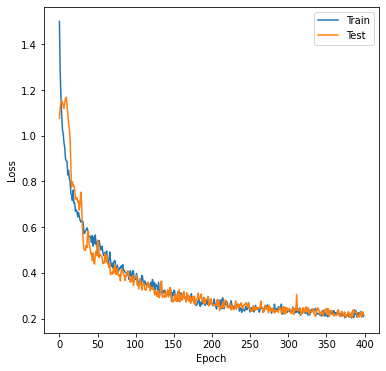

In [ ]:
smodel, ensemble = etrainer.train_ensemble_from_scratch(
    images, labels, images_test, labels_test, n_models=10)

Make a prediction:

Batch 1/1

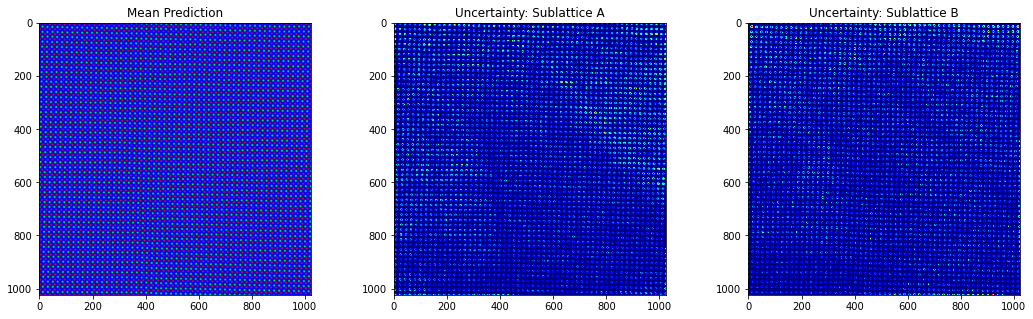

In [ ]:
predictor = aoi.predictors.EnsemblePredictor(smodel, ensemble, nb_classes=3)
nn_out_mean, nn_out_var = predictor.predict(expdata)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.imshow(nn_out_mean[0])
ax1.set_title("Mean Prediction")
ax2.imshow(nn_out_var[0][..., 0], cmap='jet', vmin=0, vmax=0.02)
ax2.set_title("Uncertainty: Sublattice A")
ax3.imshow(nn_out_var[0][..., 1], cmap='jet', vmin=0, vmax=0.015)
ax3.set_title("Uncertainty: Sublattice B");

## ImSpec

Same approaches but for im2spec model:

In [ ]:
import atomai as aoi
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
download_link = "https://drive.google.com/uc?id=18CjoX3TmZfP2ZAQVEzWalWTvyhapXcS4"
!gdown $download_link -O 'imspec_data.npz'

dataset = np.load('imspec_data.npz')
imgs = dataset['im2spec_images']
spectra = dataset['im2spec_spectra']
specval = dataset['im2spec_specval']

Train-test split:

In [ ]:
imgs_train, spectra_train, imgs_test, spectra_test = aoi.utils.data_split(imgs, spectra)

### SWAG

In [37]:
etrainer = aoi.trainers.EnsembleTrainer("imspec", in_dim=(16, 16), out_dim=(64,), latent_dim=10)
etrainer.compile_ensemble_trainer(training_cycles=100, full_epoch=True, swa=True, loss="mse")

/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/100 ... Training loss: 23.0503 ... Test loss: 22.0261 ... GPU memory usage: 1145/16280
Epoch 2/100 ... Training loss: 21.8478 ... Test loss: 20.9334 ... GPU memory usage: 1145/16280
Epoch 3/100 ... Training loss: 20.8777 ... Test loss: 19.6762 ... GPU memory usage: 1145/16280
Epoch 4/100 ... Training loss: 20.2145 ... Test loss: 18.7492 ... GPU memory usage: 1145/16280
Epoch 5/100 ... Training loss: 19.4625 ... Test loss: 18.6942 ... GPU memory usage: 1145/16280
Epoch 6/100 ... Training loss: 18.7574 ... Test loss: 17.049 ... GPU memory usage: 1145/16280
Epoch 7/100 ... Training loss: 17.8662 ... Test loss: 16.4395 ... GPU memory usage: 1145/16280
Epoch 8/100 ... Training loss: 17.1567 ... Test loss: 15.9409 ... GPU memory usage: 1145/16280
Epoch 9/100 ... Training loss: 16.4238 ... Test loss: 15.1224 ... GPU memory usage: 1145/16280
Epoch 10/100 ... Training loss: 15.7275 ... Test loss: 15.1535 ... GPU memory usage: 1145/16280
Epoch 11/100 ... Training loss: 14.9572 ... Test l

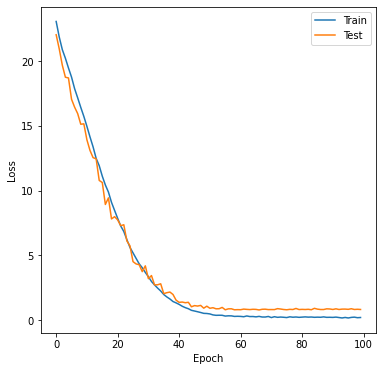

In [38]:
smodel_, ensemble_ = etrainer.train_swag(imgs_train, spectra_train, imgs_test, spectra_test, n_models=30)

Make a prediction:

In [39]:
predictor = aoi.predictors.EnsemblePredictor(
    smodel_, ensemble_, data_dype="image", output_type="spectra",
    in_dim=(16, 16), out_dim=(64,))
nn_out_mean, nn_out_var = predictor.predict(imgs_test, norm=False)

Batch 10/10

Plot results:

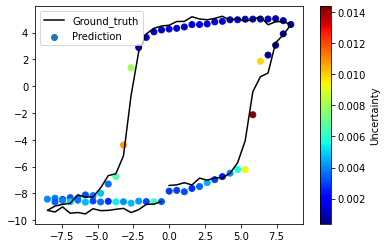

In [40]:
k = 15
plt.plot(specval[0, :64], spectra_test[k], c='black', label="Ground_truth")
plt.scatter(specval[0, :64], nn_out_mean[k,:,0], c=nn_out_var[k,:,0],
            cmap='jet', label="Prediction")
plt.colorbar(label="Uncertainty")
plt.legend(loc="upper left")

### From baseline

Training baseline model...


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 23.0503 ... Test loss: 22.0261 ... GPU memory usage: 1143/16280
Epoch 2/60 ... Training loss: 21.8478 ... Test loss: 20.9334 ... GPU memory usage: 1143/16280
Epoch 3/60 ... Training loss: 20.8777 ... Test loss: 19.6762 ... GPU memory usage: 1143/16280
Epoch 4/60 ... Training loss: 20.2145 ... Test loss: 18.7492 ... GPU memory usage: 1143/16280
Epoch 5/60 ... Training loss: 19.4625 ... Test loss: 18.6942 ... GPU memory usage: 1143/16280
Epoch 6/60 ... Training loss: 18.7574 ... Test loss: 17.049 ... GPU memory usage: 1143/16280
Epoch 7/60 ... Training loss: 17.8662 ... Test loss: 16.4395 ... GPU memory usage: 1143/16280
Epoch 8/60 ... Training loss: 17.1567 ... Test loss: 15.9409 ... GPU memory usage: 1143/16280
Epoch 9/60 ... Training loss: 16.4238 ... Test loss: 15.1224 ... GPU memory usage: 1143/16280
Epoch 10/60 ... Training loss: 15.7275 ... Test loss: 15.1535 ... GPU memory usage: 1143/16280
Epoch 11/60 ... Training loss: 14.9572 ... Test loss: 13.921

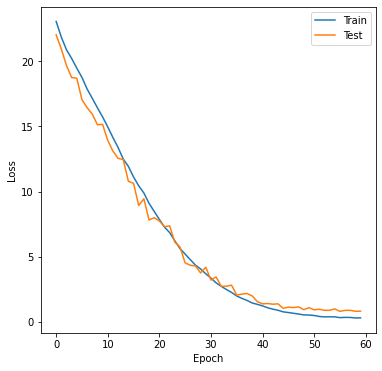


Training ensemble models (strategy = 'from_baseline')

Ensemble model 1
Epoch 1/10 ... Training loss: 0.3666 ... Test loss: 0.8984 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3282 ... Test loss: 0.8324 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.2915 ... Test loss: 0.8222 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2919 ... Test loss: 0.8431 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2671 ... Test loss: 0.8577 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2774 ... Test loss: 0.8007 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2609 ... Test loss: 0.848 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.3128 ... Test loss: 0.8387 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2857 ... Test loss: 0.8529 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2771 ... Test loss: 0.8434 ... GPU memory usage: 1143/16280
Plottin

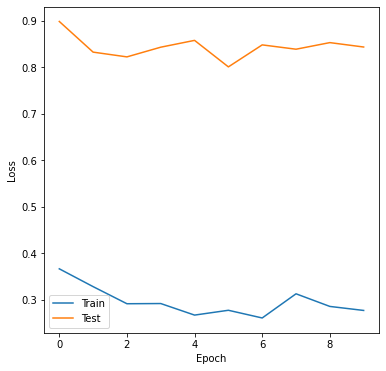


Ensemble model 2
Epoch 1/10 ... Training loss: 0.382 ... Test loss: 0.9208 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3085 ... Test loss: 0.8039 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.3012 ... Test loss: 0.858 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2653 ... Test loss: 0.825 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2716 ... Test loss: 0.8621 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.277 ... Test loss: 0.8048 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.28 ... Test loss: 0.8296 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2968 ... Test loss: 0.8356 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.3063 ... Test loss: 0.8535 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2814 ... Test loss: 0.8468 ... GPU memory usage: 1143/16280
Plotting training history


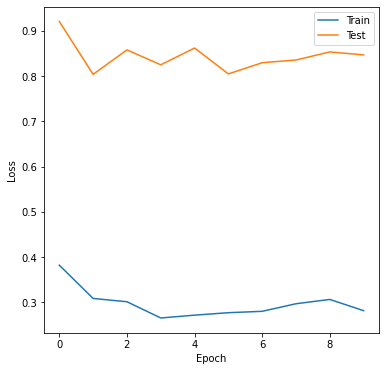


Ensemble model 3
Epoch 1/10 ... Training loss: 0.4097 ... Test loss: 0.9039 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3277 ... Test loss: 0.8139 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.314 ... Test loss: 0.8303 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.286 ... Test loss: 0.7742 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2531 ... Test loss: 0.852 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2891 ... Test loss: 0.8002 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2741 ... Test loss: 0.8428 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2736 ... Test loss: 0.8308 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2428 ... Test loss: 0.8151 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2737 ... Test loss: 0.8324 ... GPU memory usage: 1143/16280
Plotting training history


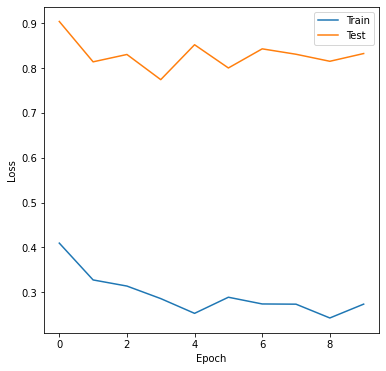


Ensemble model 4
Epoch 1/10 ... Training loss: 0.4285 ... Test loss: 0.8916 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3341 ... Test loss: 0.8682 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.2693 ... Test loss: 0.8345 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.319 ... Test loss: 0.9312 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.3118 ... Test loss: 0.85 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.3302 ... Test loss: 0.8358 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.274 ... Test loss: 0.8288 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2819 ... Test loss: 0.8085 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2824 ... Test loss: 0.813 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2577 ... Test loss: 0.8712 ... GPU memory usage: 1143/16280
Plotting training history


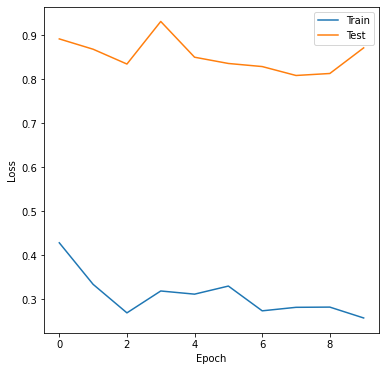


Ensemble model 5
Epoch 1/10 ... Training loss: 0.4051 ... Test loss: 0.8419 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3084 ... Test loss: 0.8189 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.2532 ... Test loss: 0.7883 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2811 ... Test loss: 0.8424 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2406 ... Test loss: 0.8359 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.262 ... Test loss: 0.8526 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2634 ... Test loss: 0.8301 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2573 ... Test loss: 0.8314 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2933 ... Test loss: 0.8427 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.275 ... Test loss: 0.9012 ... GPU memory usage: 1143/16280
Plotting training history


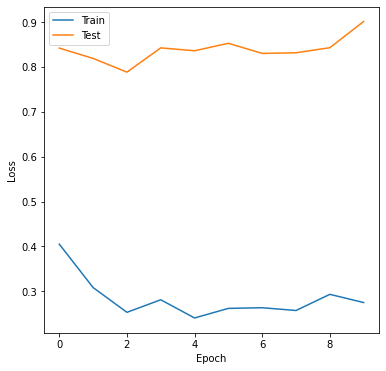


Ensemble model 6
Epoch 1/10 ... Training loss: 0.384 ... Test loss: 0.8489 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.365 ... Test loss: 0.8379 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.3004 ... Test loss: 0.8201 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2832 ... Test loss: 0.8654 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2808 ... Test loss: 0.8503 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2839 ... Test loss: 0.8271 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2658 ... Test loss: 0.8391 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2593 ... Test loss: 0.8472 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.273 ... Test loss: 0.8086 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2877 ... Test loss: 0.7991 ... GPU memory usage: 1143/16280
Plotting training history


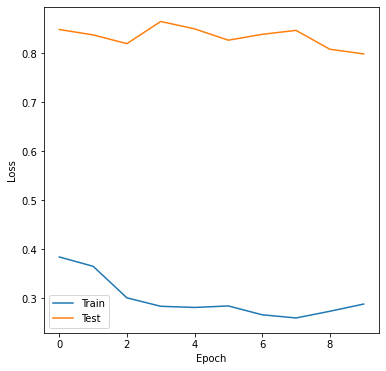


Ensemble model 7
Epoch 1/10 ... Training loss: 0.3829 ... Test loss: 0.9229 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3153 ... Test loss: 0.8325 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.3314 ... Test loss: 0.9044 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2899 ... Test loss: 0.8346 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2695 ... Test loss: 0.8758 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2769 ... Test loss: 0.8502 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2676 ... Test loss: 0.8436 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2467 ... Test loss: 0.8411 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2329 ... Test loss: 0.8085 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2544 ... Test loss: 0.8152 ... GPU memory usage: 1143/16280
Plotting training history


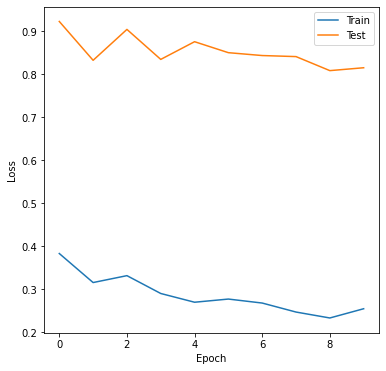


Ensemble model 8
Epoch 1/10 ... Training loss: 0.3908 ... Test loss: 0.8629 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3316 ... Test loss: 0.8833 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.3443 ... Test loss: 0.8478 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2662 ... Test loss: 0.8459 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2685 ... Test loss: 0.8303 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2801 ... Test loss: 0.7946 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.238 ... Test loss: 0.831 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2379 ... Test loss: 0.8542 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2569 ... Test loss: 0.8556 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2836 ... Test loss: 0.8338 ... GPU memory usage: 1143/16280
Plotting training history


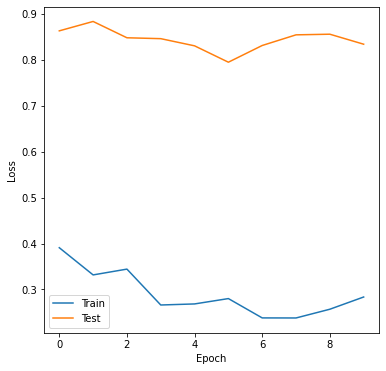


Ensemble model 9
Epoch 1/10 ... Training loss: 0.3948 ... Test loss: 0.8828 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3474 ... Test loss: 0.8438 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.2956 ... Test loss: 0.8277 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.299 ... Test loss: 0.8451 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2896 ... Test loss: 0.945 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2763 ... Test loss: 0.7773 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2319 ... Test loss: 0.8643 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.2547 ... Test loss: 0.8332 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2434 ... Test loss: 0.81 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.3037 ... Test loss: 0.8235 ... GPU memory usage: 1143/16280
Plotting training history


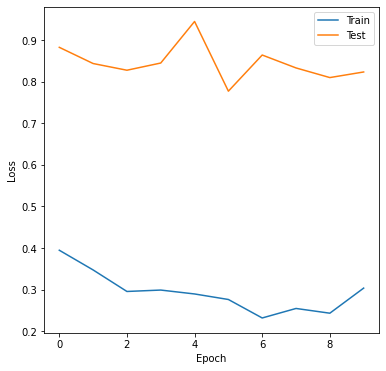


Ensemble model 10
Epoch 1/10 ... Training loss: 0.3945 ... Test loss: 0.8989 ... GPU memory usage: 1143/16280
Epoch 2/10 ... Training loss: 0.3458 ... Test loss: 0.8757 ... GPU memory usage: 1143/16280
Epoch 3/10 ... Training loss: 0.2989 ... Test loss: 0.8591 ... GPU memory usage: 1143/16280
Epoch 4/10 ... Training loss: 0.2786 ... Test loss: 0.8021 ... GPU memory usage: 1143/16280
Epoch 5/10 ... Training loss: 0.2799 ... Test loss: 0.8279 ... GPU memory usage: 1143/16280
Epoch 6/10 ... Training loss: 0.2621 ... Test loss: 0.7775 ... GPU memory usage: 1143/16280
Epoch 7/10 ... Training loss: 0.2682 ... Test loss: 0.8531 ... GPU memory usage: 1143/16280
Epoch 8/10 ... Training loss: 0.3016 ... Test loss: 0.8365 ... GPU memory usage: 1143/16280
Epoch 9/10 ... Training loss: 0.2782 ... Test loss: 0.8944 ... GPU memory usage: 1143/16280
Epoch 10/10 ... Training loss: 0.2527 ... Test loss: 0.8403 ... GPU memory usage: 1143/16280
Plotting training history


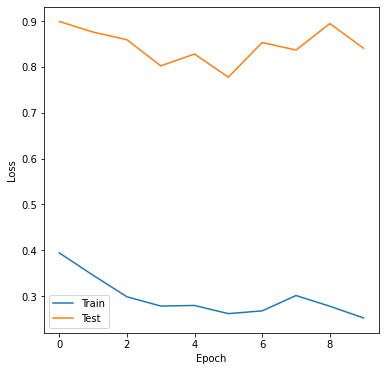

In [41]:
etrainer = aoi.trainers.EnsembleTrainer("imspec", in_dim=(16, 16), out_dim=(64,), latent_dim=10)
etrainer.compile_ensemble_trainer(full_epoch=True, swa=False, loss="mse")

smodel_, ensemble_ = etrainer.train_ensemble_from_baseline(
    imgs_train, spectra_train, imgs_test, spectra_test,
    training_cycles_base=60, training_cycles_ensemble=10, n_models=10)

In [42]:
predictor = aoi.predictors.EnsemblePredictor(
    smodel_, ensemble_, data_dype="image", output_type="spectra",
    in_dim=(16, 16), out_dim=(64,))
nn_out_mean, nn_out_var = predictor.predict(imgs_test, norm=False)

Batch 10/10

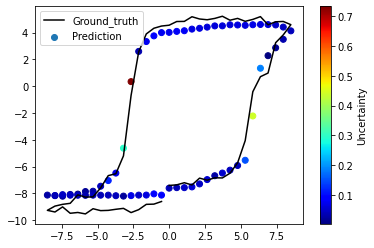

In [43]:
k = 15
plt.plot(specval[0, :64], spectra_test[k], c='black', label="Ground_truth")
plt.scatter(specval[0, :64], nn_out_mean[k,:,0], c=nn_out_var[k,:,0],
            cmap='jet', label="Prediction")
plt.colorbar(label="Uncertainty")
plt.legend(loc="upper left")

### From scratch

Training ensemble models (strategy = 'from_scratch')

Ensemble model 1


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 20.127 ... Test loss: 19.5741 ... GPU memory usage: 1143/16280
Epoch 2/60 ... Training loss: 18.4409 ... Test loss: 18.1455 ... GPU memory usage: 1143/16280
Epoch 3/60 ... Training loss: 17.6395 ... Test loss: 16.543 ... GPU memory usage: 1143/16280
Epoch 4/60 ... Training loss: 16.7839 ... Test loss: 16.0604 ... GPU memory usage: 1143/16280
Epoch 5/60 ... Training loss: 15.8393 ... Test loss: 15.033 ... GPU memory usage: 1143/16280
Epoch 6/60 ... Training loss: 15.0877 ... Test loss: 13.7329 ... GPU memory usage: 1143/16280
Epoch 7/60 ... Training loss: 14.2066 ... Test loss: 13.2948 ... GPU memory usage: 1143/16280
Epoch 8/60 ... Training loss: 13.4336 ... Test loss: 12.6473 ... GPU memory usage: 1143/16280
Epoch 9/60 ... Training loss: 12.6701 ... Test loss: 11.835 ... GPU memory usage: 1143/16280
Epoch 10/60 ... Training loss: 11.9801 ... Test loss: 11.8884 ... GPU memory usage: 1143/16280
Epoch 11/60 ... Training loss: 11.2036 ... Test loss: 10.3236 .

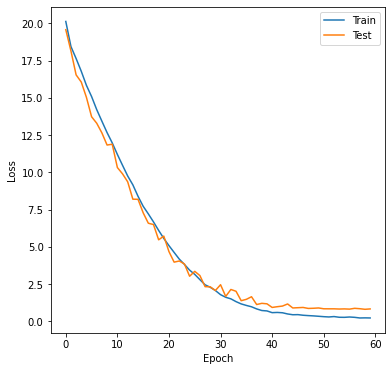


Ensemble model 2


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 23.0503 ... Test loss: 22.0261 ... GPU memory usage: 1143/16280
Epoch 2/60 ... Training loss: 21.8478 ... Test loss: 20.9334 ... GPU memory usage: 1143/16280
Epoch 3/60 ... Training loss: 20.8777 ... Test loss: 19.6762 ... GPU memory usage: 1143/16280
Epoch 4/60 ... Training loss: 20.2145 ... Test loss: 18.7492 ... GPU memory usage: 1143/16280
Epoch 5/60 ... Training loss: 19.4625 ... Test loss: 18.6942 ... GPU memory usage: 1143/16280
Epoch 6/60 ... Training loss: 18.7574 ... Test loss: 17.049 ... GPU memory usage: 1143/16280
Epoch 7/60 ... Training loss: 17.8662 ... Test loss: 16.4395 ... GPU memory usage: 1143/16280
Epoch 8/60 ... Training loss: 17.1567 ... Test loss: 15.9409 ... GPU memory usage: 1143/16280
Epoch 9/60 ... Training loss: 16.4238 ... Test loss: 15.1224 ... GPU memory usage: 1143/16280
Epoch 10/60 ... Training loss: 15.7275 ... Test loss: 15.1535 ... GPU memory usage: 1143/16280
Epoch 11/60 ... Training loss: 14.9572 ... Test loss: 13.921

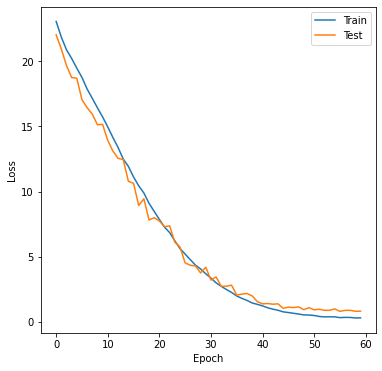


Ensemble model 3


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 23.8517 ... Test loss: 22.5954 ... GPU memory usage: 1145/16280
Epoch 2/60 ... Training loss: 22.7661 ... Test loss: 21.5761 ... GPU memory usage: 1145/16280
Epoch 3/60 ... Training loss: 21.933 ... Test loss: 21.0707 ... GPU memory usage: 1145/16280
Epoch 4/60 ... Training loss: 21.2902 ... Test loss: 20.0712 ... GPU memory usage: 1145/16280
Epoch 5/60 ... Training loss: 20.5611 ... Test loss: 19.4379 ... GPU memory usage: 1145/16280
Epoch 6/60 ... Training loss: 19.7988 ... Test loss: 18.724 ... GPU memory usage: 1145/16280
Epoch 7/60 ... Training loss: 19.0369 ... Test loss: 17.8015 ... GPU memory usage: 1145/16280
Epoch 8/60 ... Training loss: 18.2853 ... Test loss: 17.3228 ... GPU memory usage: 1145/16280
Epoch 9/60 ... Training loss: 17.5096 ... Test loss: 17.2183 ... GPU memory usage: 1145/16280
Epoch 10/60 ... Training loss: 16.7714 ... Test loss: 15.2912 ... GPU memory usage: 1145/16280
Epoch 11/60 ... Training loss: 15.9382 ... Test loss: 15.038 

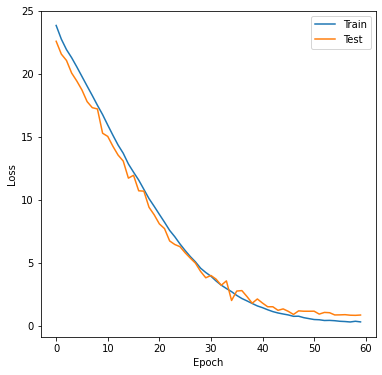


Ensemble model 4


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 25.1816 ... Test loss: 24.2762 ... GPU memory usage: 1145/16280
Epoch 2/60 ... Training loss: 24.2698 ... Test loss: 23.339 ... GPU memory usage: 1145/16280
Epoch 3/60 ... Training loss: 23.5889 ... Test loss: 22.5354 ... GPU memory usage: 1145/16280
Epoch 4/60 ... Training loss: 22.7764 ... Test loss: 21.746 ... GPU memory usage: 1145/16280
Epoch 5/60 ... Training loss: 22.0505 ... Test loss: 20.8378 ... GPU memory usage: 1145/16280
Epoch 6/60 ... Training loss: 21.3729 ... Test loss: 20.196 ... GPU memory usage: 1145/16280
Epoch 7/60 ... Training loss: 20.7123 ... Test loss: 19.2217 ... GPU memory usage: 1145/16280
Epoch 8/60 ... Training loss: 19.9317 ... Test loss: 19.1787 ... GPU memory usage: 1145/16280
Epoch 9/60 ... Training loss: 19.1134 ... Test loss: 18.0773 ... GPU memory usage: 1145/16280
Epoch 10/60 ... Training loss: 18.3688 ... Test loss: 17.3824 ... GPU memory usage: 1145/16280
Epoch 11/60 ... Training loss: 17.6557 ... Test loss: 16.3564 

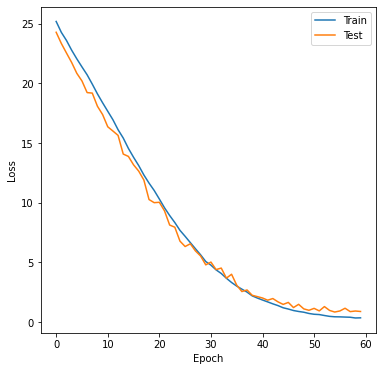


Ensemble model 5


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 25.9599 ... Test loss: 25.0019 ... GPU memory usage: 1147/16280
Epoch 2/60 ... Training loss: 24.9935 ... Test loss: 24.2089 ... GPU memory usage: 1147/16280
Epoch 3/60 ... Training loss: 24.2843 ... Test loss: 23.3847 ... GPU memory usage: 1147/16280
Epoch 4/60 ... Training loss: 23.6293 ... Test loss: 22.5017 ... GPU memory usage: 1147/16280
Epoch 5/60 ... Training loss: 22.9652 ... Test loss: 21.8599 ... GPU memory usage: 1147/16280
Epoch 6/60 ... Training loss: 22.2255 ... Test loss: 21.2279 ... GPU memory usage: 1147/16280
Epoch 7/60 ... Training loss: 21.5987 ... Test loss: 20.4995 ... GPU memory usage: 1147/16280
Epoch 8/60 ... Training loss: 20.842 ... Test loss: 19.7045 ... GPU memory usage: 1147/16280
Epoch 9/60 ... Training loss: 20.0077 ... Test loss: 18.8404 ... GPU memory usage: 1147/16280
Epoch 10/60 ... Training loss: 19.3432 ... Test loss: 18.3938 ... GPU memory usage: 1147/16280
Epoch 11/60 ... Training loss: 18.6638 ... Test loss: 17.429

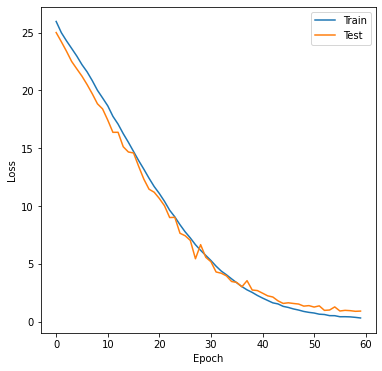


Ensemble model 6


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 18.9487 ... Test loss: 17.24 ... GPU memory usage: 1147/16280
Epoch 2/60 ... Training loss: 16.3988 ... Test loss: 16.7717 ... GPU memory usage: 1147/16280
Epoch 3/60 ... Training loss: 15.3912 ... Test loss: 15.1677 ... GPU memory usage: 1147/16280
Epoch 4/60 ... Training loss: 14.3367 ... Test loss: 13.681 ... GPU memory usage: 1147/16280
Epoch 5/60 ... Training loss: 13.6178 ... Test loss: 13.3244 ... GPU memory usage: 1147/16280
Epoch 6/60 ... Training loss: 12.721 ... Test loss: 11.7524 ... GPU memory usage: 1147/16280
Epoch 7/60 ... Training loss: 11.963 ... Test loss: 10.9403 ... GPU memory usage: 1147/16280
Epoch 8/60 ... Training loss: 11.1799 ... Test loss: 10.2109 ... GPU memory usage: 1147/16280
Epoch 9/60 ... Training loss: 10.312 ... Test loss: 9.4418 ... GPU memory usage: 1147/16280
Epoch 10/60 ... Training loss: 9.6581 ... Test loss: 9.2112 ... GPU memory usage: 1147/16280
Epoch 11/60 ... Training loss: 8.9259 ... Test loss: 7.861 ... GPU m

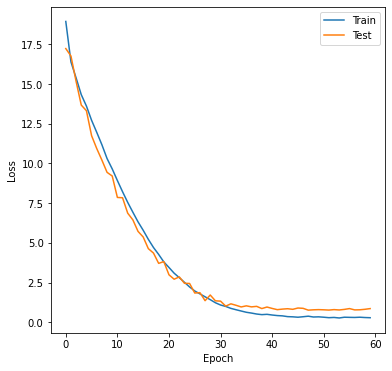


Ensemble model 7


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 27.5236 ... Test loss: 26.4344 ... GPU memory usage: 1149/16280
Epoch 2/60 ... Training loss: 26.9043 ... Test loss: 25.7848 ... GPU memory usage: 1149/16280
Epoch 3/60 ... Training loss: 26.2576 ... Test loss: 24.9262 ... GPU memory usage: 1149/16280
Epoch 4/60 ... Training loss: 25.6867 ... Test loss: 24.6621 ... GPU memory usage: 1149/16280
Epoch 5/60 ... Training loss: 25.1451 ... Test loss: 23.9921 ... GPU memory usage: 1149/16280
Epoch 6/60 ... Training loss: 24.514 ... Test loss: 23.0671 ... GPU memory usage: 1149/16280
Epoch 7/60 ... Training loss: 23.6732 ... Test loss: 22.5652 ... GPU memory usage: 1149/16280
Epoch 8/60 ... Training loss: 23.0426 ... Test loss: 21.4281 ... GPU memory usage: 1149/16280
Epoch 9/60 ... Training loss: 22.2906 ... Test loss: 21.1257 ... GPU memory usage: 1149/16280
Epoch 10/60 ... Training loss: 21.5599 ... Test loss: 20.068 ... GPU memory usage: 1149/16280
Epoch 11/60 ... Training loss: 20.7944 ... Test loss: 19.4635

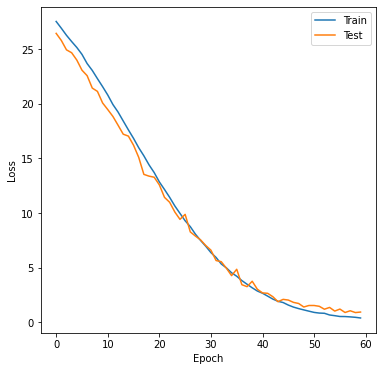


Ensemble model 8


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 22.4792 ... Test loss: 21.1683 ... GPU memory usage: 1151/16280
Epoch 2/60 ... Training loss: 20.9587 ... Test loss: 20.4765 ... GPU memory usage: 1151/16280
Epoch 3/60 ... Training loss: 20.0415 ... Test loss: 18.8141 ... GPU memory usage: 1151/16280
Epoch 4/60 ... Training loss: 19.1466 ... Test loss: 18.0644 ... GPU memory usage: 1151/16280
Epoch 5/60 ... Training loss: 18.4211 ... Test loss: 17.385 ... GPU memory usage: 1151/16280
Epoch 6/60 ... Training loss: 17.4952 ... Test loss: 16.8526 ... GPU memory usage: 1151/16280
Epoch 7/60 ... Training loss: 16.8328 ... Test loss: 16.0135 ... GPU memory usage: 1151/16280
Epoch 8/60 ... Training loss: 16.0301 ... Test loss: 14.934 ... GPU memory usage: 1151/16280
Epoch 9/60 ... Training loss: 15.1547 ... Test loss: 14.3856 ... GPU memory usage: 1151/16280
Epoch 10/60 ... Training loss: 14.415 ... Test loss: 13.7448 ... GPU memory usage: 1151/16280
Epoch 11/60 ... Training loss: 13.7173 ... Test loss: 12.3454 

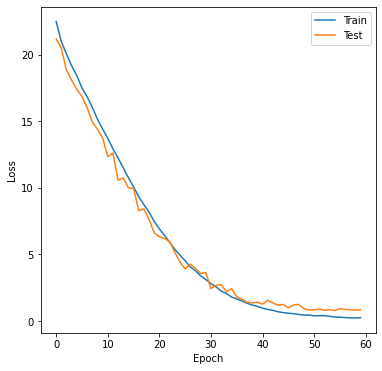


Ensemble model 9


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 22.4962 ... Test loss: 21.4046 ... GPU memory usage: 1151/16280
Epoch 2/60 ... Training loss: 21.0602 ... Test loss: 20.5089 ... GPU memory usage: 1151/16280
Epoch 3/60 ... Training loss: 20.2044 ... Test loss: 19.8087 ... GPU memory usage: 1151/16280
Epoch 4/60 ... Training loss: 19.2839 ... Test loss: 18.8117 ... GPU memory usage: 1151/16280
Epoch 5/60 ... Training loss: 18.4735 ... Test loss: 17.6542 ... GPU memory usage: 1151/16280
Epoch 6/60 ... Training loss: 17.7222 ... Test loss: 17.0231 ... GPU memory usage: 1151/16280
Epoch 7/60 ... Training loss: 16.9033 ... Test loss: 15.9689 ... GPU memory usage: 1151/16280
Epoch 8/60 ... Training loss: 16.1399 ... Test loss: 15.4768 ... GPU memory usage: 1151/16280
Epoch 9/60 ... Training loss: 15.2984 ... Test loss: 14.5613 ... GPU memory usage: 1151/16280
Epoch 10/60 ... Training loss: 14.6181 ... Test loss: 13.4532 ... GPU memory usage: 1151/16280
Epoch 11/60 ... Training loss: 13.8502 ... Test loss: 12.98

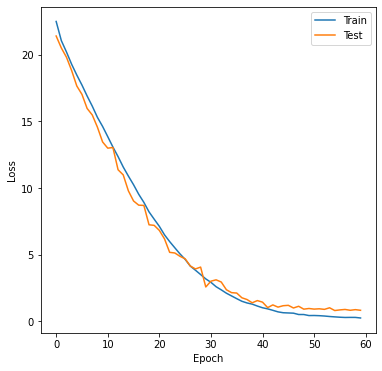


Ensemble model 10


/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:89: UserWarning: Adding a channel dimension of 1 to training images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:94: UserWarning: Adding a channel dimension of 1 to test images
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:99: UserWarning: Adding a channel dimension of 1 to training spectra
  UserWarning)
/usr/local/lib/python3.7/dist-packages/atomai/utils/preproc.py:104: UserWarning: Adding a channel dimension of 1 to test spectra
  UserWarning)


Epoch 1/60 ... Training loss: 23.6112 ... Test loss: 21.9415 ... GPU memory usage: 1153/16280
Epoch 2/60 ... Training loss: 21.901 ... Test loss: 21.4421 ... GPU memory usage: 1153/16280
Epoch 3/60 ... Training loss: 21.217 ... Test loss: 20.0348 ... GPU memory usage: 1153/16280
Epoch 4/60 ... Training loss: 20.4179 ... Test loss: 19.7603 ... GPU memory usage: 1153/16280
Epoch 5/60 ... Training loss: 19.5966 ... Test loss: 19.13 ... GPU memory usage: 1153/16280
Epoch 6/60 ... Training loss: 18.9784 ... Test loss: 18.1042 ... GPU memory usage: 1153/16280
Epoch 7/60 ... Training loss: 18.1798 ... Test loss: 17.5434 ... GPU memory usage: 1153/16280
Epoch 8/60 ... Training loss: 17.2528 ... Test loss: 15.602 ... GPU memory usage: 1153/16280
Epoch 9/60 ... Training loss: 16.5927 ... Test loss: 15.4285 ... GPU memory usage: 1153/16280
Epoch 10/60 ... Training loss: 15.7418 ... Test loss: 15.0494 ... GPU memory usage: 1153/16280
Epoch 11/60 ... Training loss: 14.9979 ... Test loss: 14.1927 ..

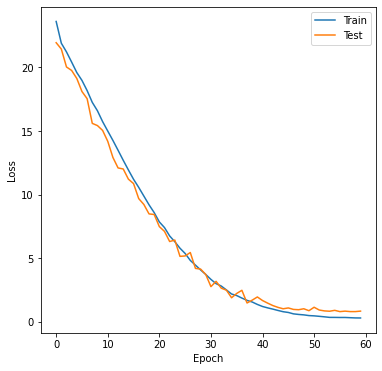

In [ ]:
etrainer = aoi.trainers.EnsembleTrainer("imspec", in_dim=(16, 16), out_dim=(64,), latent_dim=10)
etrainer.compile_ensemble_trainer(training_cycles=60, full_epoch=True, swa=True, loss="mse")

smodel_, ensemble_ = etrainer.train_ensemble_from_scratch(
    imgs_train, spectra_train, imgs_test, spectra_test, n_models=10)

In [ ]:
predictor = aoi.predictors.EnsemblePredictor(
    smodel_, ensemble_, data_dype="image", output_type="spectra",
    in_dim=(16, 16), out_dim=(64,))
nn_out_mean, nn_out_var = predictor.predict(imgs_test, norm=False)

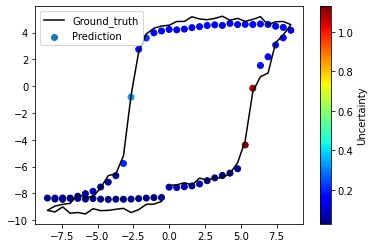

In [36]:
k = 15
plt.plot(specval[0, :64], spectra_test[k], c='black', label="Ground_truth")
plt.scatter(specval[0, :64], nn_out_mean[k,:,0], c=nn_out_var[k,:,0],
            cmap='jet', label="Prediction")
plt.colorbar(label="Uncertainty")
plt.legend(loc="upper left")